# Assignment overview <ignore>
The overarching goal of this assignment is to produce a research report in which you implement, analyse, and discuss various Neural Network techniques. You will be guided through the process of producing this report, which will provide you with experience in report writing that will be useful in any research project you might be involved in later in life.

All of your report, including code and Markdown/text, ***must*** be written up in ***this*** notebook. This is not typical for research, but is solely for the purpose of this assignment. Please make sure you change the title of this file so that XXXXXX is replaced by your candidate number. You can use code cells to write code to implement, train, test, and analyse your NNs, as well as to generate figures to plot data and the results of your experiments. You can use Markdown/text cells to describe and discuss the modelling choices you make, the methods you use, and the experiments you conduct. So that we can mark your reports with greater consistency, please ***do not***:

* rearrange the sequence of cells in this notebook.
* delete any cells, including the ones explaining what you need to do.

If you want to add more code cells, for example to help organise the figures you want to show, then please add them directly after the code cells that have already been provided.

Please provide verbose comments throughout your code so that it is easy for us to interpret what you are attempting to achieve with your code. Long comments are useful at the beginning of a block of code. Short comments, e.g. to explain the purpose of a new variable, or one of several steps in some analyses, are useful on every few lines of code, if not on every line. Please do not use the code cells for writing extensive sentences/paragraphs that should instead be in the Markdown/text cells.

# Abstract/Introduction (instructions) - 15 MARKS <ignore>
Use the next Markdown/text cell to write a short introduction to your report. This should include:
* a brief description of the topic (image classification) and of the dataset being used (CIFAR10 dataset). (2 MARKS)
* a brief description of how the CIFAR10 dataset has aided the development of neural network techniques, with examples. (3 MARKS)
* a descriptive overview of what the goal of your report is, including what you investigated. (5 MARKS)
* a summary of your major findings. (3 MARKS)
* two or more relevant references. (2 MARKS)

Image classifcation is a task in computer vision where the main objective is to categorise images into classes based on their visuals. The CIFAR-10 dataset comprises of 60’000 32x32 colour images which are divided into 10 of these classes: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, and truck with 50’000 images being a training set and 10’000 images being a test set.

The CIFAR10 dataset has aided the development of neural network techniques, with examples like that of ResNet which set new standards in image classifcation using the CIFAR-10 dataset(He et al., 2016). Here, shortcut connections were introduced allowing the preservation of information from the input layer by directly passing it into a later layer allowing it to achieve a prediction accuracy of 93.57%. From there, the WideResNet was developed which modifies the ResNet architecture by increasing the number of filters in each layer, rather than the depth, which was further tested on the CIFAR10 dataset (Zagoruyko and Komodakis, 2017) for evaluation, granting an even greater prediction accuracy.

The goal of this report is to design and evaluate a deep CNN for multiclass classifcation using the CIFAR10 dataset. This report develops a baseline CNN model and then investigates various factors affecting the model’s performance. This report investigates the impact of different learning rates on the model’s performance and designs a learning rate scheduler. Furthermore, this report investigates the effect of dropout to see the effect on the model’s accuracy. A transfer learning task is then performed using the trained network. In the last experiment, the quality of gradient flow through the CNN and its performance is analysed. First, for a model without dropout, then, using the best-performing dropout rate from the previous experiment, the same gradient analysis is performed to investigate the affect of dropout rate. Third, batch normalisation is added to each hidden layer, and the same gradient analysis is repeated to evaluate batch normalisations impact. Finally, learning curves for both training and validation data are then plotted for models with and without Batch Normalisations to access the effect on modern performance.

Experiment 1 found that the best learning rate to start with for the adams optimiser was 0.001, with the learning rate scheduler improving accuracy compared to without one.

Experiment 2 found the most optimal dropout rate was 0.6, although upon investigating the transfer learning task found that no dropout was better than a dropout rate of 0.6, suggesting that a lower dropout rate of 0.2 may have been superior.

Experiment 3 showed that batch normalisation aided in faster convergence opposed to no batch normalisation, while also aiding in stability as seen in the reduction of standard deviation in gradient flow.


# Methodology (instructions) - 55 MARKS <ignore>
Use the next cells in this Methodology section to describe and demonstrate the details of what you did, in practice, for your research. Cite at least two academic papers that support your model choices. The overarching prinicple of writing the Methodology is to ***provide sufficient details for someone to replicate your model and to reproduce your results, without having to resort to your code***. You must include at least these components in the Methodology:
* Data - Decribe the dataset, including how it is divided into training, validation, and test sets. Describe any pre-processing you perform on the data, and explain any advantages or disadvantages to your choice of pre-processing.
* Architecture - Describe the architecture of your model, including all relevant hyperparameters. The architecture must include 3 convolutional layers followed by two fully connected layers. Include a figure with labels to illustrate the architecture.
* Loss function - Describe the loss function(s) you are using, and explain any advantages or disadvantages there are with respect to the classification task.
* Optimiser - Describe the optimiser(s) you are using, including its hyperparameters, and explain any advantages or disadvantages there are to using that optimser.
* Experiments - Describe how you conducted each experiment, including any changes made to the baseline model that has already been described in the other Methodology sections. Explain the methods used for training the model and for assessing its performance on validation/test data.


## Data (7 MARKS) <ignore>

The dataset is the CIFAR-10 dataset, which was divided into three subsets: a training set of 80% of the 50’000 training images, making 40’000 training images, Validation set, which was used to tune the hyperparameters and validate the model during training was the other 20%, at 10’000 images. Finally, the test set contained 10’000 images, which was used to evaluate the final model performance. Pre-processing consisted of converting the images into a PyTorch tensor into a H x W x C format (Height, Width, Number of Channels (3 for RGB)) and normalising the pixel values and the image mean / standard deviation which had been pre calculated from the same dataset, mean of (0.4914, 0.4822, 0.4465) and standard deviation of (0.2023, 0.1994, 0.2010.)

## Architecture (17 MARKS) <ignore>

The architecture of the baseline model as shown in figure 2 starts with the input to the network as a 32x32x3 image. The first layer is a convolutional layer that applies 32 filters of size 3x3 with a padding of 1. This is followed up by a ReLU activation function which introduces non-linearity into the model. From there the max pooling layer uses a 2x2 kernel with a stride of 2.

The second convolutional layer applies 64 filters of the size 3x3 with a padding of 1, which is then followed by a ReLU activation function and a max pooling layer, using the same 2x2 kernel with a stride of 2.
The third convolutional layer uses 128 filters of size 3x3 with a padding of 1, followed by another ReLU activation function and a max pooling layer with a 2x2 kernel and stride of 2.

Following this, the model includes a flattening layer that converts the 4x4x128 output into a 1D tensor of 2048, leading to a fully connected layer of 512 units, followed by a ReLU activation function. The final layer is a fully connected layer that will transform the 512 units into 10 output units, corresponding to the 10 classes.

For this baseline model, the hyperparameters include a learning rate of 0.001, the adam optimiser, cross-entropy loss, a batch size of 100 and 10 epochs of training. Data normalisation is performed using the pre-calculated mean and standard deviation values of (0.4914, 0.4822, 0.4465) and (0.2023, 0.1994, 0.2010) respectively.

In experiment 1, the architecture changes the learning rates at (0.002, 0.0015, 0.001, 0.00075, 0.0005) and is being tested over 20 epochs. The learning rate scheduler had a factor of 0.1 – which is multiplied by the learning rate to get the new learning rate, it also had a patience of 3, which was how long the model had to plateau for until it was applied.  In experiment 2, the architecture is again the same as the baseline, except for a dropout layer before the output layer, consisting of dropout rates of: (0.0,0.2, 0.4,0.6,0.8). Experiment 3 also starts with the baseline architecture, but incorporates a dropout of 0.6 in part 2, batch normalisation layers are also included in parts 3 / 4 after each convolutional layer and before the fully connected layer.

Figure 1 demonstrates the general architecture of the baseline model, showing the general flow of data through the different layers to the output layer.


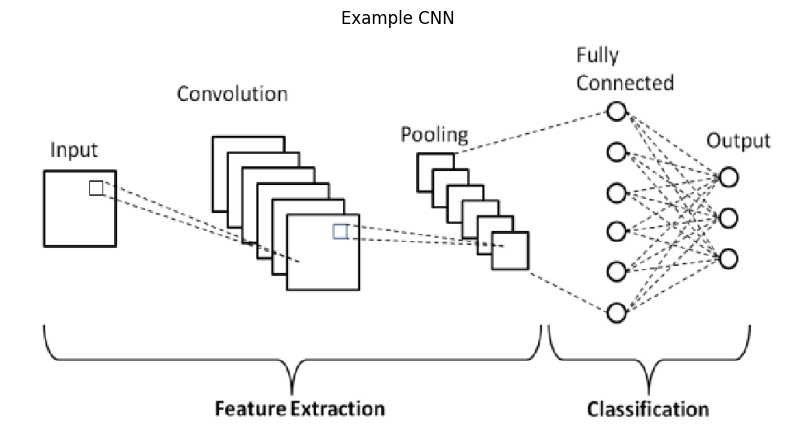

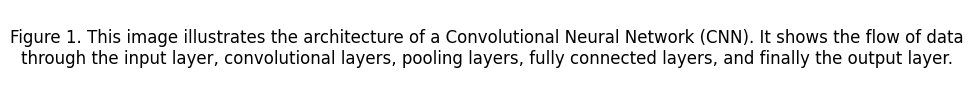

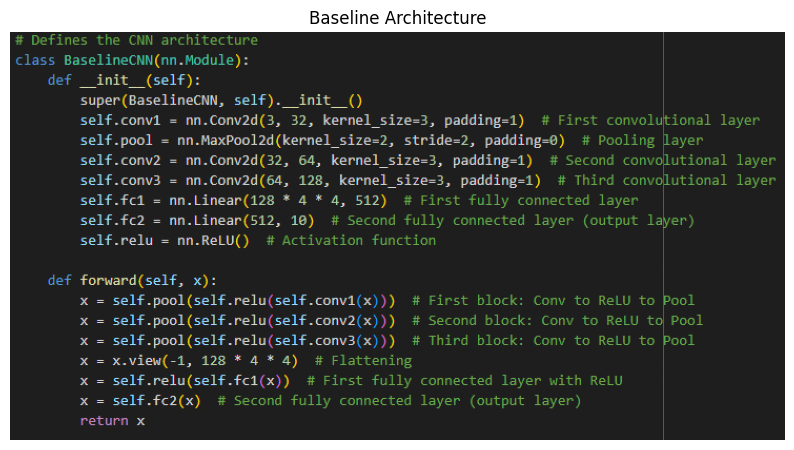

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = 'CNN Example.png'
img = mpimg.imread(image_path)
fig = plt.figure(figsize=(10, 10))

plt.title('Example CNN')

plt.imshow(img)
plt.axis('off')
plt.show()

captionText = ('Figure 1. Demonstrates the general architecture of the baseline model, showing the general flow of data through the different layers to the output layer. (Phung and Rhee, 2019)')

fig, ax = plt.subplots(figsize=(10, 1))
fig.patch.set_visible(False)
ax.axis('off')

plt.text(0.5, 0.5, captionText, ha='center', va='center', wrap=True, fontsize=12)
plt.show()

image_path = 'Architecture.PNG'
img = mpimg.imread(image_path)
fig = plt.figure(figsize=(10, 10))

plt.title('Baseline Architecture')

plt.imshow(img)
plt.axis('off')
plt.show()

captionText = ('Figure 2. Shows the Baseline Architecture')

fig, ax = plt.subplots(figsize=(10, 1))
fig.patch.set_visible(False)
ax.axis('off')

plt.text(0.5, 0.5, captionText, ha='center', va='center', wrap=True, fontsize=12)
plt.show()


## Loss function (3 MARKS) <ignore>

Throughout all models, the cross-entropy loss function was used to measure the performance of the classifcation model. Cross entropy loss quantifies how well the predicted probabilities align with the true labels of the class, penalising incorrect predictions heavily. This helps improve the model’s accuracy by minimising the difference between the predicted probabilities and the actual class labels. The CIFAR-10 dataset is ideal for this loss function, as it involves a multi-class classification task where the model outputs probabilities for each class and assigns them to their true labels.

## Optimser (4 MARKS) <ignore>

Throughout all the experiments and the baseline, the Adams Optimiser was chosen. This is an optimisation algorithm that allows for adaptive learning rates and fast convergence.
Despite Adams advantages, for experiment 1, SGD may have offered better insights as it would have static learning rates, allowing a better understanding of how learning rates affect the model throughout the entire training process. Furthermore, to allow for faster converging a higher momentum could be used to negate the need for excessive epochs with the limited computational overhead available.

## Experiments <ignore>
### Experiment 1 (8 MARKS)

In experiment 1 we assessed the impact of different learning rates on the CNN models performance.  The model was trained over 20 epochs through 5 different learning rates: 0.002, 0.0015, 0.001, 0.00075, and 0.0005 on the baseline model (figure 2), where each training configuration was run five times with different random seed, then averaging the results to mitigate the effect of randomness. During each epoch, the model’s parameters were updated based on the training data, and the performance was then evaluated on the validation set. A further sub-experiment was conducted using a learning rate scheduler, ReduceLROnPlateau, which adjusted the learning rate based on the validation loss. Here the best learning rate with and without the scheduler was plotted for accuracy and compared.  The results of these experiments identified the best initial learning rate, with and without a learning rate scheduler.

### Experiment 2 (8 MARKS) <ignore>

In experiment 2 we investigated the impact of regularisation on the performance of our baseline CNN model by implementing dropout in the fully connected layers. The dataset was split into two halves, on training and the other validation. We experimented with five different dropout rates: 0 (no drop out), 0.2, 0.4, 0.6, 0.8. The model was trained for 10 epochs, using the adams optimiser with a learning rate of 0.001 and the CrossEntrophyLoss function for a loss metric. A further transfer learning task was then conducted where the training and validation datasets were swapped. Two models were applied to the task, one without dropout, and the best performing dropout (0.6), where we retrained the fully connected layers for 10 epochs. Learning curve plots were generated for both tasks, illustrating the effect of dropout on model performance.

### Experiment 3 (8 MARKS) <ignore>

Experiment 3 investigated the quality of gradient flow through the network, understanding the impact of dropout and batch normalisation on the model’s performance. The gradients were examined over the first and last 5 epochs (10 epochs) for three different models: the baseline model, the baseline model with dropout (0.6) and the baseline model with batch normalisation after each convolutional layer and before the fully connected layer. The optimiser was the adams optimiser, with a learning rate of 0.001. Performance was assessed using accuracy metrics on the validation and test sets.

In [ ]:
########################################################################################
### Code for building the baseline model ###############################################
### Adapted from: https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html ###
########################################################################################
import torch
import torch.nn as nn
#import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# Defines the transformations for the training and test sets.
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)) # Normalisations based on mean/S.D across RGB channels, not provided Pytorch (0.5, 0.5, 0.5), (0.5, 0.5, 0.5)
])

# Loads the CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=100, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)

# Defines the CNN architecture
class BaselineCNN(nn.Module):
    def __init__(self):
        super(BaselineCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)  # First convolutional layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)  # Pooling layer
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)  # Second convolutional layer
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)  # Third convolutional layer
        self.fc1 = nn.Linear(128 * 4 * 4, 512)  # First fully connected layer
        self.fc2 = nn.Linear(512, 10)  # Second fully connected layer (output layer)
        self.relu = nn.ReLU()  # Activation function

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))  # First block: Conv to ReLU to Pool
        x = self.pool(self.relu(self.conv2(x)))  # Second block: Conv to ReLU to Pool
        x = self.pool(self.relu(self.conv3(x)))  # Third block: Conv to ReLU to Pool
        x = x.view(-1, 128 * 4 * 4)  # Flattening
        x = self.relu(self.fc1(x))  # First fully connected layer with ReLU
        x = self.fc2(x)  # Second fully connected layer (output layer)
        return x

# Instantiate the model, define the loss function and the optimiser
net = BaselineCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)  # Adam instead of SGD as converges faster

# Train the model
for epoch in range(10):  # Loop over the dataset multiple times
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        # zero the parameter gradients
        optimizer.zero_grad()
        # forward + backward + optimise
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.item()
        if i % 100 == 99:  #Prints every 100 mini-batches
            print(f'[Epoch {epoch + 1}, Batch {i + 1}] loss: {running_loss / 100:.3f}')
            running_loss = 0.0

print('Finished Training')

# Evaluates the model on the test set
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total}%')


Files already downloaded and verified
Files already downloaded and verified
[Epoch 1, Batch 100] loss: 1.796
[Epoch 1, Batch 200] loss: 1.430
[Epoch 1, Batch 300] loss: 1.272
[Epoch 1, Batch 400] loss: 1.159
[Epoch 1, Batch 500] loss: 1.076
[Epoch 2, Batch 100] loss: 0.980
[Epoch 2, Batch 200] loss: 0.916
[Epoch 2, Batch 300] loss: 0.896
[Epoch 2, Batch 400] loss: 0.883
[Epoch 2, Batch 500] loss: 0.845
[Epoch 3, Batch 100] loss: 0.742
[Epoch 3, Batch 200] loss: 0.745
[Epoch 3, Batch 300] loss: 0.703
[Epoch 3, Batch 400] loss: 0.698
[Epoch 3, Batch 500] loss: 0.732
[Epoch 4, Batch 100] loss: 0.584
[Epoch 4, Batch 200] loss: 0.573
[Epoch 4, Batch 300] loss: 0.579
[Epoch 4, Batch 400] loss: 0.581
[Epoch 4, Batch 500] loss: 0.589
[Epoch 5, Batch 100] loss: 0.462
[Epoch 5, Batch 200] loss: 0.473
[Epoch 5, Batch 300] loss: 0.479
[Epoch 5, Batch 400] loss: 0.472
[Epoch 5, Batch 500] loss: 0.475
[Epoch 6, Batch 100] loss: 0.331
[Epoch 6, Batch 200] loss: 0.367
[Epoch 6, Batch 300] loss: 0.352


# Results (instructions) - 55 MARKS <ignore>
Use the Results section to summarise your findings from the experiments. For each experiment, use the Markdown/text cell to describe and explain your results, and use the code cell (and additional code cells if necessary) to conduct the experiment and produce figures to show your results.

### Experiment 1 (17 MARKS) <ignore>

Experiment one focuses on five different learning rates: 0.002, 0.0015, 0.001, 0.00075, and 0.0005. Figure 3 demonstrates the learning curves for these learning rates, showing that lower learning rates converged more slowly shown by the slowest convergence being the 0.0005 learning curve.
The best performing learning rate, determined by the highest validation accuracy at any epoch, was found to be 0.001, averaging around 75%, providing a good balance between convergence speed and stability.
To further improve the model’s performance, a learning rate scheduler was introduced to reduce the learning rate when the validation loss plateaued, aiming to enhance the generalisation of the data after not achieving a greater accuracy after 3 epochs (patience set to 3). Figure 4 demonstrates this, attaining a greater accuracy in both the training and validation sets where after the performance plateaued for three epochs, the learning rate was reduced to 10% of the original and attained greater accuracies, suggesting that the scheduler helped generalise the data and mitigate overfitting. The difference in performance between without the scheduler and with the scheduler was 2.56%, without the scheduler validation reaching 74.38% and with the scheduler attaining 76.94%. Furthermore, the generalisability gap was smaller for the model using the scheduler, further demonstrating greater generalisation of the data.


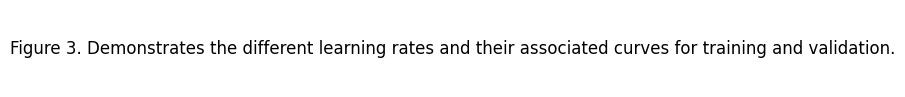

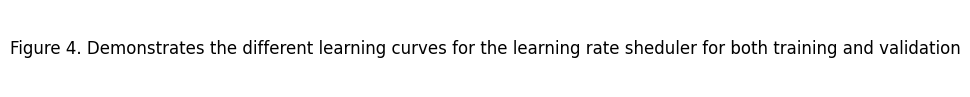

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = 'Learning curves for Different Learning Rates.png'
img = mpimg.imread(image_path)
fig = plt.figure(figsize=(10, 10))

plt.title('Learning curves for Different Learning Rates')

plt.imshow(img)
plt.axis('off')
plt.show()

captionText = ('Figure 3. Demonstrates the different learning rates and their associated curves for training and validation.')

fig, ax = plt.subplots(figsize=(10, 1))
fig.patch.set_visible(False)
ax.axis('off')

plt.text(0.5, 0.5, captionText, ha='center', va='center', wrap=True, fontsize=12)
plt.show()

image_path = 'Learning Ragte Scheduler 30 epochs.png'
img = mpimg.imread(image_path)
fig = plt.figure(figsize=(10, 10))

plt.title('Learning Curves with Learning Rate Scheduler')

plt.imshow(img)
plt.axis('off')
plt.show()

captionText = ('Figure 4. Demonstrates the different learning curves for the learning rate sheduler for both training and validation')

fig, ax = plt.subplots(figsize=(10, 1))
fig.patch.set_visible(False)
ax.axis('off')

plt.text(0.5, 0.5, captionText, ha='center', va='center', wrap=True, fontsize=12)
plt.show()


Defining transformations...
Loading CIFAR10 dataset...
Files already downloaded and verified
Files already downloaded and verified
Splitting the dataset into training and validation sets...
Creating data loaders...
Data loaders created.
Defining the CNN model...
Model defined.
Training with different learning rates...
Training with learning rate: 0.002
Training model with learning rate: 0.002, epochs: 20, runs: 5, scheduler: False
Run 1/5...
Epoch 1/20...
Epoch 1 - Train Accuracy: 50.58%, Val Accuracy: 62.05%, Val Loss: 1.0716
Epoch 2/20...
Epoch 2 - Train Accuracy: 66.98%, Val Accuracy: 69.88%, Val Loss: 0.8609
Epoch 3/20...
Epoch 3 - Train Accuracy: 73.72%, Val Accuracy: 72.43%, Val Loss: 0.7941
Epoch 4/20...
Epoch 4 - Train Accuracy: 78.36%, Val Accuracy: 72.96%, Val Loss: 0.7965
Epoch 5/20...
Epoch 5 - Train Accuracy: 82.97%, Val Accuracy: 74.54%, Val Loss: 0.7884
Epoch 6/20...
Epoch 6 - Train Accuracy: 86.52%, Val Accuracy: 74.05%, Val Loss: 0.8599
Epoch 7/20...
Epoch 7 - Train Ac

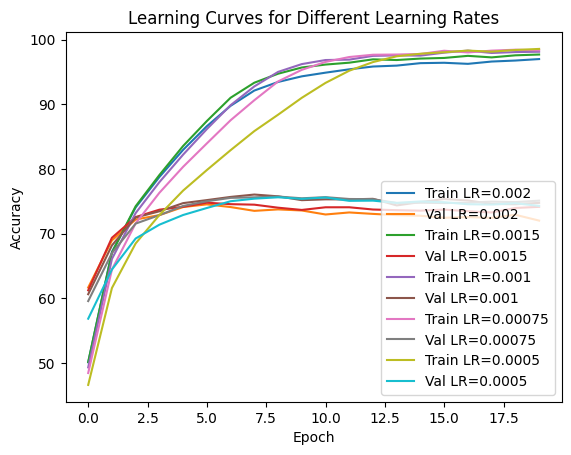

Training with different learning rates completed.
Best learning rate selected: 0.001
Training with learning rate scheduler...
Training model with learning rate: 0.001, epochs: 20, runs: 5, scheduler: True
Run 1/5...
Epoch 1/20...
Epoch 1 - Train Accuracy: 49.80%, Val Accuracy: 60.08%, Val Loss: 1.1171
Epoch 2/20...
Epoch 2 - Train Accuracy: 65.99%, Val Accuracy: 68.42%, Val Loss: 0.8985
Epoch 3/20...
Epoch 3 - Train Accuracy: 72.77%, Val Accuracy: 73.59%, Val Loss: 0.7721
Epoch 4/20...
Epoch 4 - Train Accuracy: 77.59%, Val Accuracy: 73.95%, Val Loss: 0.7503
Epoch 5/20...
Epoch 5 - Train Accuracy: 82.05%, Val Accuracy: 74.48%, Val Loss: 0.7669
Epoch 6/20...
Epoch 6 - Train Accuracy: 86.02%, Val Accuracy: 75.67%, Val Loss: 0.7814
Epoch 7/20...
Epoch 7 - Train Accuracy: 89.83%, Val Accuracy: 75.25%, Val Loss: 0.8369
Epoch 8/20...
Epoch 8 - Train Accuracy: 92.64%, Val Accuracy: 75.78%, Val Loss: 0.9225
Epoch 9/20...
Epoch 9 - Train Accuracy: 98.11%, Val Accuracy: 77.78%, Val Loss: 0.9378
E

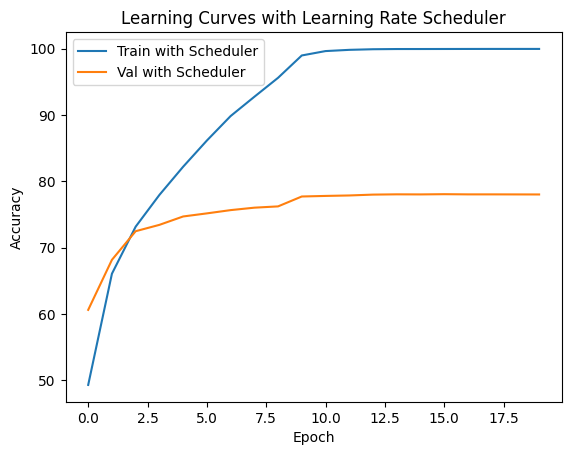

Training with learning rate scheduler completed.
Training final model with best learning rate...
Final model - Epoch 1/20
Final model - Epoch 2/20
Final model - Epoch 3/20
Final model - Epoch 4/20
Final model - Epoch 5/20
Final model - Epoch 6/20
Final model - Epoch 7/20
Final model - Epoch 8/20
Final model - Epoch 9/20
Final model - Epoch 10/20
Final model - Epoch 11/20
Final model - Epoch 12/20
Final model - Epoch 13/20
Final model - Epoch 14/20
Final model - Epoch 15/20
Final model - Epoch 16/20
Final model - Epoch 17/20
Final model - Epoch 18/20
Final model - Epoch 19/20
Final model - Epoch 20/20
Evaluating model...
Model evaluation completed with accuracy: 74.38%
Accuracy of the network on the 10000 test images: 74.38%
Training final model with learning rate scheduler...
Final model with scheduler - Epoch 1/20
Final model with scheduler - Epoch 2/20
Final model with scheduler - Epoch 3/20
Final model with scheduler - Epoch 4/20
Final model with scheduler - Epoch 5/20
Final model w

In [ ]:
#############################
### Code for Experiment 1 ###
#############################
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import random_split, DataLoader
import numpy as np
import matplotlib.pyplot as plt

print("Defining transformations...")
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

# Loads the CIFAR10 dataset
# This step downloads and loads the CIFAR10 dataset and applies the defined transformations to both the training and test sets

print("Loading CIFAR10 dataset...")
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Splits the training set into training and validation sets
# The training dataset is split into two subsets: one for training (80%) and one for validation (20%)
# Helps in evaluating the model's performance

print("Splitting the dataset into training and validation sets...")
train_size = int(0.8 * len(trainset))
val_size = len(trainset) - train_size
train_subset, val_subset = random_split(trainset, [train_size, val_size])

# Create data loaders
# Data loaders are created for the training, validation, and test sets

print("Creating data loaders...")
trainloader = DataLoader(train_subset, batch_size=100, shuffle=True, num_workers=2)
valloader = DataLoader(val_subset, batch_size=100, shuffle=False, num_workers=2)
testloader = DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)
print("Data loaders created.")

# Define the CNN architecture as seen in the baseline

print("Defining the CNN model...")
class BaselineCNN(nn.Module):
    def __init__(self):
        super(BaselineCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(128 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        x = x.view(-1, 128 * 4 * 4)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

print("Model defined.")

# This function trains the CNN model for a specified number of epochs and runs and also codes the learning rate scheduler
# Tracks and prints the training and validation accuracy for each epoch.
def train_model(learning_rate, num_epochs=20, num_runs=5, use_scheduler=False):
    print(f"Training model with learning rate: {learning_rate}, epochs: {num_epochs}, runs: {num_runs}, scheduler: {use_scheduler}")

    # Lists to store the accuracy values for training and validation across all runs
    train_acc_list = []
    val_acc_list = []

    # Loops for multiple runs (5) to average the results
    for run in range(num_runs):
        print(f"Run {run+1}/{num_runs}...")

        # Set the random seed
        torch.manual_seed(run)
        np.random.seed(run)

        # Instantiate the model, loss function, and optimiser
        net = BaselineCNN()
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(net.parameters(), lr=learning_rate)

        # Define a learning rate scheduler
        if use_scheduler:
            scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3) #Factor = amount LR is reduced, so reduced to 10%, Patience = how long plateau until applies.

        # Lists to store the accuracy values for training and validation for that current run
        train_acc = []
        val_acc = []

        # Loops for the specified number of epochs (20)
        for epoch in range(num_epochs):
            print(f"Epoch {epoch+1}/{num_epochs}...")
            net.train()  # Set the model to training mode

            # Variables to track the number of correct predictions and total samples for training
            correct_train = 0
            total_train = 0

            # Loops over the training data
            for inputs, labels in trainloader:
                optimizer.zero_grad()  # Zeros the parameter gradients
                outputs = net(inputs)  # Forward pass
                loss = criterion(outputs, labels)  # Computes loss
                loss.backward()  # Backward pass
                optimizer.step()  # Optimises weights

                # Gets predictions and updates the number of correct predictions
                _, predicted = torch.max(outputs.data, 1)
                total_train += labels.size(0)
                correct_train += (predicted == labels).sum().item()

            # Calculates and stores the training accuracy for the current epoch
            train_accuracy = 100 * correct_train / total_train
            train_acc.append(train_accuracy)

            net.eval()  # Set the model to evaluation mode

            # Variables to track the number of correct predictions and total samples for validation
            correct_val = 0
            total_val = 0
            val_loss = 0.0

            # Disable gradient computation for validation
            with torch.no_grad():
                # Loops over the validation data
                for inputs, labels in valloader:
                    outputs = net(inputs)  # Forward pass
                    loss = criterion(outputs, labels)  # Computes loss
                    val_loss += loss.item()
                    _, predicted = torch.max(outputs.data, 1)
                    total_val += labels.size(0)
                    correct_val += (predicted == labels).sum().item()

            # Calculates and stores the validation loss and accuracy for the current epoch
            val_loss /= len(valloader)
            val_accuracy = 100 * correct_val / total_val
            val_acc.append(val_accuracy)
            print(f"Epoch {epoch+1} - Train Accuracy: {train_accuracy:.2f}%, Val Accuracy: {val_accuracy:.2f}%, Val Loss: {val_loss:.4f}")

            # Step the scheduler based on validation loss
            if use_scheduler:
                scheduler.step(val_loss)

        # Stores the training and validation accuracies for the current run
        train_acc_list.append(train_acc)
        val_acc_list.append(val_acc)
        print(f"Run {run+1} completed.")

    # Calculates the average training and validation accuracies across all runs
    avg_train_acc = np.mean(train_acc_list, axis=0)
    avg_val_acc = np.mean(val_acc_list, axis=0)
    print("Training completed for all runs.")

    # Returns the average training and validation accuracies
    return avg_train_acc, avg_val_acc

# Defines learning rates to experiment with
# This step defines the learning rates to be used for the training experiments
# Then trains the model for each learning rate and plots resulting learning curves
learning_rates = [0.002, 0.0015, 0.001, 0.00075, 0.0005]
num_epochs = 20  # Number of epochs

print("Training with different learning rates...")
learning_rate_results = {}
for lr in learning_rates:
    print(f"Training with learning rate: {lr}")
    train_acc, val_acc = train_model(learning_rate=lr, num_epochs=num_epochs, num_runs=5)
    learning_rate_results[lr] = (train_acc, val_acc)
    plt.plot(range(num_epochs), train_acc, label=f'Train LR={lr}')
    plt.plot(range(num_epochs), val_acc, label=f'Val LR={lr}')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Learning Curves for Different Learning Rates')
plt.legend()
plt.show()
print("Training with different learning rates completed.")

# Determines the best learning rate based on validation performance
best_lr = max(learning_rate_results, key=lambda lr: max(learning_rate_results[lr][1])) # Selects the learning rate with the highest validation accuracy at any epoch
print(f"Best learning rate selected: {best_lr}")

# Trains the model with learning rate scheduler and plots the results
# This step trains the model using a learning rate scheduler, which adjusts the learning rate based on the validation loss
# Then plots the learning curves for this training process
print("Training with learning rate scheduler...")
train_acc, val_acc = train_model(learning_rate=best_lr, num_epochs=num_epochs, num_runs=5, use_scheduler=True)
plt.plot(range(num_epochs), train_acc, label='Train with Scheduler')
plt.plot(range(num_epochs), val_acc, label='Val with Scheduler')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Learning Curves with Learning Rate Scheduler')
plt.legend()
plt.show()
print("Training with learning rate scheduler completed.")

# Evaluates the model with the best learning rate on the test set
# Function evaluates the trained model on the test dataset, calculating and printing the accuracy.
def evaluate_model(net, testloader):
    print("Evaluating model...")
    net.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f"Model evaluation completed with accuracy: {accuracy:.2f}%")
    return accuracy

# Trains the final model with the best learning rate and evaluate on test set
# This step trains the final model using the best learning rate (0.00075)
# It then evaluates the model on the test set to determine its accuracy.
print("Training final model with best learning rate...")
net = BaselineCNN()
optimizer = optim.Adam(net.parameters(), lr=best_lr)
criterion = nn.CrossEntropyLoss()
for epoch in range(num_epochs):
    print(f"Final model - Epoch {epoch+1}/{num_epochs}")
    net.train()
    for inputs, labels in trainloader:
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

test_accuracy = evaluate_model(net, testloader)
print(f'Accuracy of the network on the 10000 test images: {test_accuracy}%')

# Train the final model with the learning rate scheduler and evaluate on test set
# This step trains the final model using the learning rate scheduler.
# It then evaluates the model on the test set to determine its accuracy.
print("Training final model with learning rate scheduler...")
net = BaselineCNN()
optimizer = optim.Adam(net.parameters(), lr=best_lr)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3)
for epoch in range(num_epochs):
    print(f"Final model with scheduler - Epoch {epoch+1}/{num_epochs}")
    net.train()
    for inputs, labels in trainloader:
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    # Calculate validation loss for scheduler step
    val_loss = 0.0
    net.eval()
    with torch.no_grad():
        for inputs, labels in valloader:
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    val_loss /= len(valloader)
    scheduler.step(val_loss)

test_accuracy_scheduler = evaluate_model(net, testloader)
print(f'Accuracy of the network on the 10000 test images with scheduler: {test_accuracy_scheduler}%')


### Experiment 2 (19 MARKS) <ignore>

This experiment investigated the effects of dropout rates on the performance of CNN, with dropout rates of 0, 0.2, 0.4, 0.6 and 0.8 and evaluated their effects on training and validation accuracy over 10 epochs. Figure 5 demonstrates that lower dropout rates of 0 and 0.2 achieved a higher training accuracy, indicating less regularisation and more overfitting. Higher dropout rates such as 0.8 led to a lower training accuracy and slower convergence, and struggled to learn as effectively. Furthermore, figure 5 demonstrates that a moderate dropout rate of 0.6 to be the best for validation accuracy, suggesting that it prevents overfitting while maintaining good generalisation.
Figures 6 and 7 demonstrate the transfer learning task, with no dropout allowing greater accuracy for training, with the 0.6 dropout limiting the accuracy in training and validation, suggesting that the dropout may have been too high and is losing too much information, opposed to helping it generalise.  


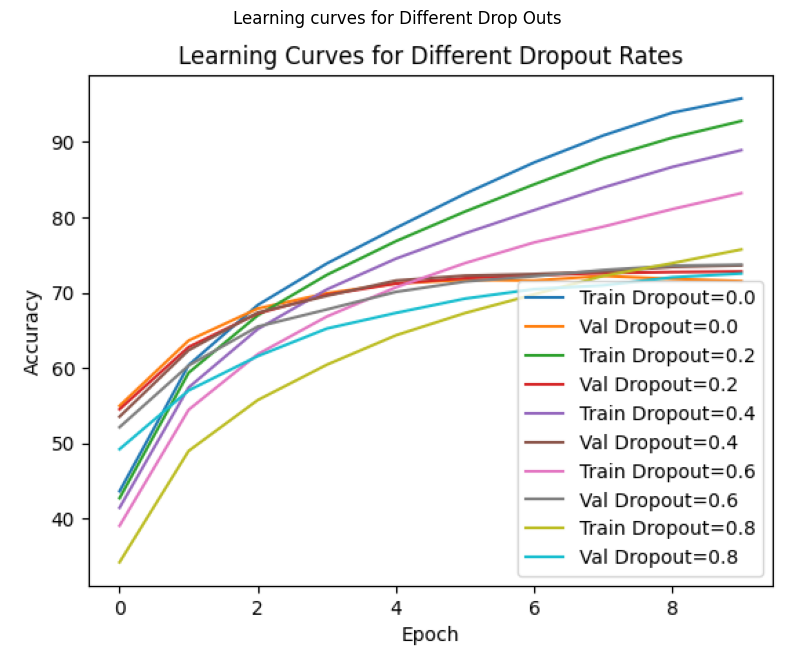

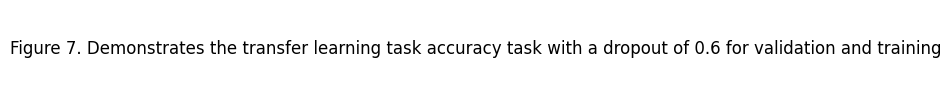

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = 'Learning curves for different drop out rates.png'
img = mpimg.imread(image_path)
fig = plt.figure(figsize=(10, 10))

plt.title('Learning curves for Different Drop Outs')

plt.imshow(img)
plt.axis('off')
plt.show()

captionText = ('Figure 5. Demonstrates the different dropouts and their associated curves for training and validation.')

fig, ax = plt.subplots(figsize=(10, 1))
fig.patch.set_visible(False)
ax.axis('off')

plt.text(0.5, 0.5, captionText, ha='center', va='center', wrap=True, fontsize=12)
plt.show()

image_path = 'Transfer Learning Task Accuracy no dropout.png'
img = mpimg.imread(image_path)
fig = plt.figure(figsize=(10, 10))

plt.title('Transfer Learning task accuracy without dropout')

plt.imshow(img)
plt.axis('off')
plt.show()

captionText = ('Figure 6. Demonstrates the transfer learning task accuracy task without dropout for validation and training')

fig, ax = plt.subplots(figsize=(10, 1))
fig.patch.set_visible(False)
ax.axis('off')

plt.text(0.5, 0.5, captionText, ha='center', va='center', wrap=True, fontsize=12)
plt.show()

image_path = 'Transfer Learning Task Accuracy 0.6 dropout.png'
img = mpimg.imread(image_path)
fig = plt.figure(figsize=(10, 10))

plt.title('Transfer learning task for 0.6 dropout')

plt.imshow(img)
plt.axis('off')
plt.show()

captionText = ('Figure 7. Demonstrates the transfer learning task accuracy task with a dropout of 0.6 for validation and training')

fig, ax = plt.subplots(figsize=(10, 1))
fig.patch.set_visible(False)
ax.axis('off')

plt.text(0.5, 0.5, captionText, ha='center', va='center', wrap=True, fontsize=12)
plt.show()



Defining transformations...
Loading CIFAR10 dataset...


100%|██████████| 170498071/170498071 [00:13<00:00, 12906549.55it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Splitting the dataset into two halves for training and validation...
Creating data loaders...
Data loaders created.
Defining the CNN model with Dropout...
Model defined.
Training with different dropout rates...
Training with dropout rate: 0.0
Training model with dropout rate: 0.0, epochs: 10, runs: 5
Run 1/5...
Epoch 1/10...
Epoch 1 - Train Accuracy: 44.94%, Val Accuracy: 55.70%, Train Loss: 1.5110, Val Loss: 1.2185
Epoch 2/10...
Epoch 2 - Train Accuracy: 60.81%, Val Accuracy: 62.30%, Train Loss: 1.1007, Val Loss: 1.0563
Epoch 3/10...
Epoch 3 - Train Accuracy: 68.56%, Val Accuracy: 68.42%, Train Loss: 0.8901, Val Loss: 0.9046
Epoch 4/10...
Epoch 4 - Train Accuracy: 74.49%, Val Accuracy: 69.51%, Train Loss: 0.7259, Val Loss: 0.8655
Epoch 5/10...
Epoch 5 - Train Accuracy: 79.25%, Val Accuracy: 71.48%, Train Loss: 0.5922, Val Loss: 0.8441
Epoch 6/10...
Epoch 6 - Train Accuracy: 84.11%, Val Accuracy: 7

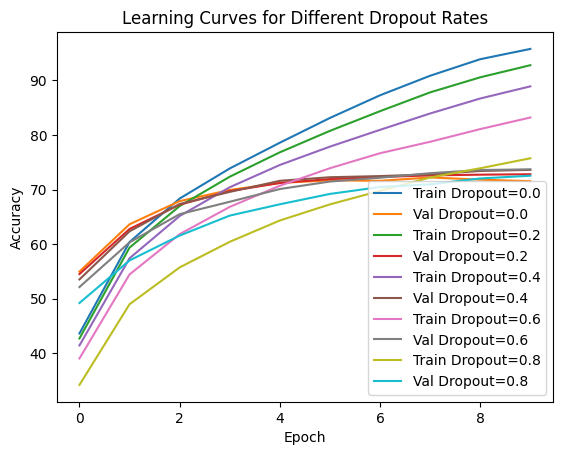

Training with different dropout rates completed.
Best Dropout Rate: 0.6
Performing transfer learning task...
Training final model with best dropout rate...
Transfer Learning - Epoch 1/10
Epoch 1 - Train Accuracy: 31.18%, Val Accuracy: 40.74%, Train Loss: 1.9086, Val Loss: 1.6577
Transfer Learning - Epoch 2/10
Epoch 2 - Train Accuracy: 41.04%, Val Accuracy: 45.24%, Train Loss: 1.6429, Val Loss: 1.5280
Transfer Learning - Epoch 3/10
Epoch 3 - Train Accuracy: 43.83%, Val Accuracy: 47.52%, Train Loss: 1.5493, Val Loss: 1.4657
Transfer Learning - Epoch 4/10
Epoch 4 - Train Accuracy: 45.96%, Val Accuracy: 49.26%, Train Loss: 1.4934, Val Loss: 1.4101
Transfer Learning - Epoch 5/10
Epoch 5 - Train Accuracy: 48.22%, Val Accuracy: 50.64%, Train Loss: 1.4424, Val Loss: 1.3755
Transfer Learning - Epoch 6/10
Epoch 6 - Train Accuracy: 49.02%, Val Accuracy: 51.92%, Train Loss: 1.4068, Val Loss: 1.3497
Transfer Learning - Epoch 7/10
Epoch 7 - Train Accuracy: 50.28%, Val Accuracy: 52.59%, Train Loss: 1

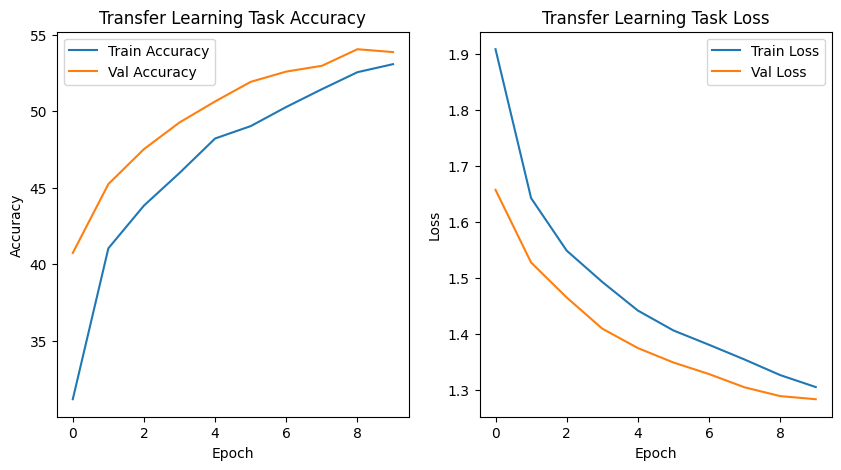

Transfer Learning Task with no dropout rate...
Transfer Learning with no dropout - Epoch 1/10
Epoch 1 - Train Accuracy: 34.85%, Val Accuracy: 42.49%, Train Loss: 1.8205, Val Loss: 1.6123
Transfer Learning with no dropout - Epoch 2/10
Epoch 2 - Train Accuracy: 45.45%, Val Accuracy: 46.59%, Train Loss: 1.5246, Val Loss: 1.5049
Transfer Learning with no dropout - Epoch 3/10
Epoch 3 - Train Accuracy: 49.21%, Val Accuracy: 49.08%, Train Loss: 1.4210, Val Loss: 1.4345
Transfer Learning with no dropout - Epoch 4/10
Epoch 4 - Train Accuracy: 51.84%, Val Accuracy: 50.77%, Train Loss: 1.3486, Val Loss: 1.3910
Transfer Learning with no dropout - Epoch 5/10
Epoch 5 - Train Accuracy: 53.83%, Val Accuracy: 51.92%, Train Loss: 1.2931, Val Loss: 1.3592
Transfer Learning with no dropout - Epoch 6/10
Epoch 6 - Train Accuracy: 55.68%, Val Accuracy: 52.82%, Train Loss: 1.2460, Val Loss: 1.3348
Transfer Learning with no dropout - Epoch 7/10
Epoch 7 - Train Accuracy: 57.13%, Val Accuracy: 53.40%, Train Loss

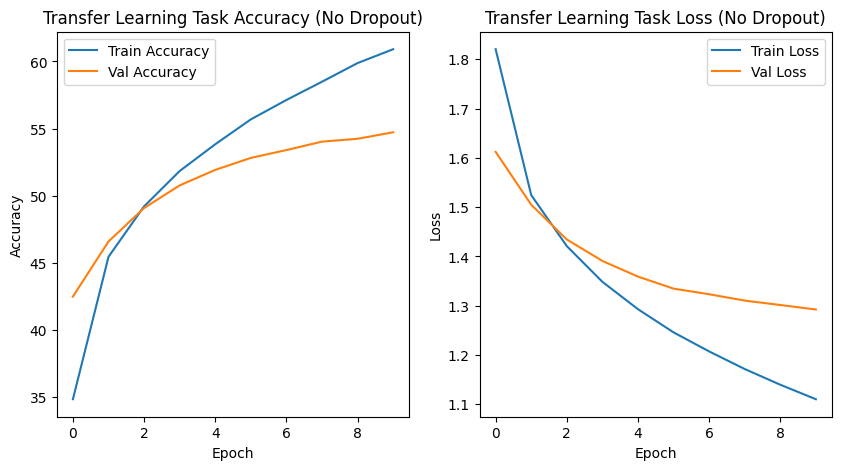

In [ ]:
#####################################################################################################################################
### Code for Experiment 2 ###########################################################################################################
### Some code adapted from: "https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html?highlight=transfer%20learning"###
#####################################################################################################################################
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import random_split, DataLoader
import numpy as np
import matplotlib.pyplot as plt

print("Defining transformations...")
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

print("Loading CIFAR10 dataset...")
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Splits the training set into two halves for training and validation
# This ensures that we can evaluate the model's performance on unseen data during training.
print("Splitting the dataset into two halves for training and validation...")
train_size = len(trainset) // 2  # Calculate the size for the training set
val_size = len(trainset) - train_size  # Calculate the size for the validation set
train_subset, val_subset = random_split(trainset, [train_size, val_size])  # Split the dataset

print("Creating data loaders...")
trainloader = DataLoader(train_subset, batch_size=100, shuffle=True, num_workers=2)
valloader = DataLoader(val_subset, batch_size=100, shuffle=False, num_workers=2)
testloader = DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)
print("Data loaders created.")

# Defines the CNN architecture with Dropout
# The model consists of three convolutional layers followed by a max-pooling layer, and two fully connected layers with ReLU activation functions and Dropout
print("Defining the CNN model with Dropout...")
class BaselineCNNWithDropout(nn.Module):
    def __init__(self, dropout_rate=0.0):
        super(BaselineCNNWithDropout, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)  # First convolutional layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)  # Max pooling layer
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)  # Second convolutional layer
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)  # Third convolutional layer
        self.fc1 = nn.Linear(128 * 4 * 4, 512)  # First fully connected layer
        self.fc2 = nn.Linear(512, 10)  # Second fully connected layer
        self.relu = nn.ReLU()  # ReLU activation function
        self.dropout = nn.Dropout(dropout_rate)  # Dropout layer

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))  # Applys first conv layer, ReLU, and pool
        x = self.pool(self.relu(self.conv2(x)))  # Applys second conv layer, ReLU, and pool
        x = self.pool(self.relu(self.conv3(x)))  # Applys third conv layer, ReLU, and pool
        x = x.view(-1, 128 * 4 * 4)  # Flatten the tensor
        x = self.relu(self.fc1(x))  # Applys first fully connected layer and ReLU
        x = self.dropout(x)  # Applys dropout
        x = self.fc2(x)  # Applys second fully connected layer
        return x

print("Model defined.")

# Function to train the model
# Trains the model for a specified number of epochs (10) and runs (5), tracking and printing the training and validation accuracy for each epoch.
def train_model(dropout_rate, num_epochs=10, num_runs=5):
    print(f"Training model with dropout rate: {dropout_rate}, epochs: {num_epochs}, runs: {num_runs}")
    train_acc_list = []  # List to store training accuracies
    val_acc_list = []  # List to store validation accuracies

    for run in range(num_runs):
        print(f"Run {run+1}/{num_runs}...")
        torch.manual_seed(run)  # Sets random seed (same results each time code is run)
        np.random.seed(run)  # Sets numpy random seed

        net = BaselineCNNWithDropout(dropout_rate)  # Initialises the model
        criterion = nn.CrossEntropyLoss()  # Defines loss function
        optimizer = optim.Adam(net.parameters(), lr=0.001)  # Define optimiser

        train_acc = []  # List to store training accuracies for this run
        val_acc = []  # List to store validation accuracies for this run

        for epoch in range(num_epochs):
            print(f"Epoch {epoch+1}/{num_epochs}...")
            net.train()  # Sets model to training mode
            correct_train = 0  # Counter for correct predictions in training
            total_train = 0  # Counter for total training samples
            running_loss_train = 0.0  # Variable to accumulate training loss

            for inputs, labels in trainloader:
                optimizer.zero_grad()  # Zero the parameter gradients
                outputs = net(inputs)  # Forward pass
                loss = criterion(outputs, labels)  # Compute loss
                loss.backward()  # Backward pass
                optimizer.step()  # Update weights

                _, predicted = torch.max(outputs.data, 1)  # Gets the predicted class
                total_train += labels.size(0)  # Updates total training samples
                correct_train += (predicted == labels).sum().item()  # Updates correct predictions
                running_loss_train += loss.item()  # Accumulate loss

            train_accuracy = 100 * correct_train / total_train  # Calculates training accuracy
            train_acc.append(train_accuracy)  # Stores training accuracy
            avg_train_loss = running_loss_train / len(trainloader)  # Calculates average training loss

            net.eval()  # Sets model to evaluation mode
            correct_val = 0  # Counter for correct predictions in validation
            total_val = 0  # Counter for total validation samples
            running_loss_val = 0.0  # Variable to accumulate validation loss

            with torch.no_grad():  # Disables gradient computation
                for inputs, labels in valloader:
                    outputs = net(inputs)  # Forward pass
                    loss = criterion(outputs, labels)  # Compute loss
                    _, predicted = torch.max(outputs.data, 1)  # Gets the predicted class
                    total_val += labels.size(0)  # Updates total validation samples
                    correct_val += (predicted == labels).sum().item()  # Updates correct predictions
                    running_loss_val += loss.item()  # Accumulate loss

            val_accuracy = 100 * correct_val / total_val  # Calculates validation accuracy
            val_acc.append(val_accuracy)  # Stores validation accuracy
            avg_val_loss = running_loss_val / len(valloader)  # Calculates average validation loss

            print(f"Epoch {epoch+1} - Train Accuracy: {train_accuracy:.2f}%, Val Accuracy: {val_accuracy:.2f}%, Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")

        train_acc_list.append(train_acc)  # Stores training accuracies for this run
        val_acc_list.append(val_acc)  # Stores validation accuracies for this run
        print(f"Run {run+1} completed.")

    avg_train_acc = np.mean(train_acc_list, axis=0)  # Calculates average training accuracy across runs
    avg_val_acc = np.mean(val_acc_list, axis=0)  # Calculates average validation accuracy across runs
    print("Training completed for all runs.")

    return avg_train_acc, avg_val_acc  # Returns average accuracies

# Define dropout rates to experiment with
dropout_rates = [0.0, 0.2, 0.4, 0.6, 0.8]
num_epochs = 10

print("Training with different dropout rates...")
learning_rate_results = {}  # Dictionary to store results for each dropout rate
for dr in dropout_rates:
    print(f"Training with dropout rate: {dr}")
    train_acc, val_acc = train_model(dropout_rate=dr, num_epochs=num_epochs)  # Trains model with current dropout rate
    learning_rate_results[dr] = (train_acc, val_acc)  # Stores results
    plt.plot(range(num_epochs), train_acc, label=f'Train Dropout={dr}')  # Plots training accuracy
    plt.plot(range(num_epochs), val_acc, label=f'Val Dropout={dr}')  # Plots validation accuracy

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Learning Curves for Different Dropout Rates')
plt.legend()
plt.show()
print("Training with different dropout rates completed.")

# Identifies the best dropout rate based on validation performance
# The best dropout rate is selected based on the highest validation accuracy!
best_dropout_rate = max(learning_rate_results, key=lambda dr: max(learning_rate_results[dr][1]))
print(f"Best Dropout Rate: {best_dropout_rate}")

# Transfer Learning Task

# This section performs a transfer learning task by swapping the training and validation datasets.
# The fully connected layers are re-initialised, and the model is trained and evaluated with the best dropout rate.
print("Performing transfer learning task...")
trainloader, valloader = valloader, trainloader  # Swap training and validation data loaders

# Function to reinitialise the fully connected layers
def reinitialize_fc_layers(net):
    net.fc1 = nn.Linear(128 * 4 * 4, 512)  # Reinitialises first fully connected layer
    net.fc2 = nn.Linear(512, 10)  # Reinitialises second fully connected layer
    return net

# Function to freeze the convolutional layers
def freeze_conv_layers(net):
    for param in net.conv1.parameters():
        param.requires_grad = False  # Freezes parameters of first conv layer
    for param in net.conv2.parameters():
        param.requires_grad = False  # Freezes parameters of second conv layer
    for param in net.conv3.parameters():
        param.requires_grad = False  # Freezes parameters of third conv layer
    return net

# Trains the final model with the best dropout rate and evaluate on test set
print("Training final model with best dropout rate...")
net = BaselineCNNWithDropout(best_dropout_rate)  # Initialises model with best dropout rate
net = freeze_conv_layers(net)  # Freezes conv layers
net = reinitialize_fc_layers(net)  # Reinitialises fully connected layers
optimizer = optim.Adam(filter(lambda p: p.requires_grad, net.parameters()), lr=0.001)  # Defines optimiser
criterion = nn.CrossEntropyLoss()  # Defines loss function

# Lists to store loss and accuracy values for plotting learning curves
train_acc_transfer = []
val_acc_transfer = []
train_loss_transfer = []
val_loss_transfer = []

for epoch in range(num_epochs):
    print(f"Transfer Learning - Epoch {epoch+1}/{num_epochs}")
    net.train()  # Sets model to training mode
    running_loss_train = 0.0  # Variable to accumulate training loss
    correct_train = 0  # Counter for correct predictions in training
    total_train = 0  # Counter for total training samples

    for inputs, labels in trainloader:
        optimizer.zero_grad()  # Zero the parameter gradients
        outputs = net(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights

        _, predicted = torch.max(outputs.data, 1)  # Gets the predicted class
        total_train += labels.size(0)  # Updates total training samples
        correct_train += (predicted == labels).sum().item()  # Updates correct predictions
        running_loss_train += loss.item()  # Accumulate loss

    avg_train_loss = running_loss_train / len(trainloader)  # Calculates average training loss
    train_loss_transfer.append(avg_train_loss)  # Stores training loss
    train_accuracy = 100 * correct_train / total_train  # Calculates training accuracy
    train_acc_transfer.append(train_accuracy)  # Stores training accuracy

    net.eval()  # Sets model to evaluation mode
    running_loss_val = 0.0  # Variable to accumulate validation loss
    correct_val = 0  # Counter for correct predictions in validation
    total_val = 0  # Counter for total validation samples

    with torch.no_grad():  # Disables gradient computation
        for inputs, labels in valloader:
            outputs = net(inputs)  # Forward pass
            loss = criterion(outputs, labels)  # Compute loss
            _, predicted = torch.max(outputs.data, 1)  # Gets the predicted class
            total_val += labels.size(0)  # Updates total validation samples
            correct_val += (predicted == labels).sum().item()  # Updates correct predictions
            running_loss_val += loss.item()  # Accumulate loss

    avg_val_loss = running_loss_val / len(valloader)  # Calculates average validation loss
    val_loss_transfer.append(avg_val_loss)  # Stores validation loss
    val_accuracy = 100 * correct_val / total_val  # Calculates validation accuracy
    val_acc_transfer.append(val_accuracy)  # Stores validation accuracy

    print(f"Epoch {epoch+1} - Train Accuracy: {train_accuracy:.2f}%, Val Accuracy: {val_accuracy:.2f}%, Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")

# Function to evaluate the model
def evaluate_model(net, testloader):
    print("Evaluating model...")
    net.eval()  # Sets model to evaluation mode
    correct = 0  # Counter for correct predictions
    total = 0  # Counter for total samples
    with torch.no_grad():  # Disables gradient computation
        for data in testloader:
            images, labels = data
            outputs = net(images)  # Forward pass
            _, predicted = torch.max(outputs.data, 1)  # Gets the predicted class
            total += labels.size(0)  # Updates total samples
            correct += (predicted == labels).sum().item()  # Updates correct predictions
    accuracy = 100 * correct / total  # Calculates accuracy
    print(f"Model evaluation completed with accuracy: {accuracy:.2f}%")
    return accuracy

test_accuracy_transfer = evaluate_model(net, testloader)
print(f'Accuracy of the network on the 10000 test images with transfer learning and best dropout rate: {test_accuracy_transfer}%')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(num_epochs), train_acc_transfer, label='Train Accuracy')
plt.plot(range(num_epochs), val_acc_transfer, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Transfer Learning Task Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(num_epochs), train_loss_transfer, label='Train Loss')
plt.plot(range(num_epochs), val_loss_transfer, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Transfer Learning Task Loss')
plt.legend()

plt.show()

# Trains with no dropout rate
# Trains the final model with no dropout rate and evaluate on test set.
print("Transfer Learning Task with no dropout rate...")
net = BaselineCNNWithDropout(0.0)  # Initialises model with no dropout rate
net = freeze_conv_layers(net)  # Freezes conv layers
net = reinitialize_fc_layers(net)  # Reinitialises fully connected layers
optimizer = optim.Adam(filter(lambda p: p.requires_grad, net.parameters()), lr=0.001)  # Define optimiser

# Lists to store loss and accuracy values for plotting learning curves
train_acc_transfer_no_dropout = []
val_acc_transfer_no_dropout = []
train_loss_transfer_no_dropout = []
val_loss_transfer_no_dropout = []

for epoch in range(num_epochs):
    print(f"Transfer Learning with no dropout - Epoch {epoch+1}/{num_epochs}")
    net.train()  # Sets model to training mode
    running_loss_train = 0.0  # Variable to accumulate training loss
    correct_train = 0  # Counter for correct predictions in training
    total_train = 0  # Counter for total training samples

    for inputs, labels in trainloader:
        optimizer.zero_grad()  # Zero the parameter gradients
        outputs = net(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights

        _, predicted = torch.max(outputs.data, 1)  # Gets the predicted class
        total_train += labels.size(0)  # Updates total training samples
        correct_train += (predicted == labels).sum().item()  # Updates correct predictions
        running_loss_train += loss.item()  # Accumulate loss

    avg_train_loss = running_loss_train / len(trainloader)  # Calculates average training loss
    train_loss_transfer_no_dropout.append(avg_train_loss)  # Stores training loss
    train_accuracy = 100 * correct_train / total_train  # Calculates training accuracy
    train_acc_transfer_no_dropout.append(train_accuracy)  # Stores training accuracy

    net.eval()  # Sets model to evaluation mode
    running_loss_val = 0.0  # Variable to accumulate validation loss
    correct_val = 0  # Counter for correct predictions in validation
    total_val = 0  # Counter for total validation samples

    with torch.no_grad():  # Disables gradient computation
        for inputs, labels in valloader:
            outputs = net(inputs)  # Forward pass
            loss = criterion(outputs, labels)  # Compute loss
            _, predicted = torch.max(outputs.data, 1)  # Gets the predicted class
            total_val += labels.size(0)  # Updates total validation samples
            correct_val += (predicted == labels).sum().item()  # Updates correct predictions
            running_loss_val += loss.item()  # Accumulate loss

    avg_val_loss = running_loss_val / len(valloader)  # Calculates average validation loss
    val_loss_transfer_no_dropout.append(avg_val_loss)  # Stores validation loss
    val_accuracy = 100 * correct_val / total_val  # Calculates validation accuracy
    val_acc_transfer_no_dropout.append(val_accuracy)  # Stores validation accuracy

    print(f"Epoch {epoch+1} - Train Accuracy: {train_accuracy:.2f}%, Val Accuracy: {val_accuracy:.2f}%, Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}")

test_accuracy_transfer_no_dropout = evaluate_model(net, testloader)
print(f'Accuracy of the network on the 10000 test images with transfer learning and no dropout rate: {test_accuracy_transfer_no_dropout}%')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(num_epochs), train_acc_transfer_no_dropout, label='Train Accuracy')
plt.plot(range(num_epochs), val_acc_transfer_no_dropout, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Transfer Learning Task Accuracy (No Dropout)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(num_epochs), train_loss_transfer_no_dropout, label='Train Loss')
plt.plot(range(num_epochs), val_loss_transfer_no_dropout, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Transfer Learning Task Loss (No Dropout)')
plt.legend()

plt.show()


### Experiment 3 (19 MARKS) <ignore>

Figures 8-11 describes the gradient flow without dropout, with high variability in the gradients showing some instability. These instabilities can have a potential to turn into vanishing or exploding gradients. There is a low amount of gradient flow in general, spanning around 0.000125 to 0.000025. By the end of training, the gradients for all layers have decreased significantly, suggesting a low learning rate. The near zero gradients in the fully connected layers may be indicative of a vanishing gradient.

Figures 12-15 demonstrate the affect of dropout on the gradient, with the gradients still being relatively small, but higher than the without the dropout. There is also a high variability, especially in the early layers, which shows that the dropout introduces variability. By the end of training, the gradients remain stable but small.

The next figure, 16-19, demonstrates the affect of batch normalisation on the gradients, which is that of preventing exploding gradients, but more over in this case trying to prevent vanishing ones, as you see in the bn1, bn2 and bn3 layers with higher gradient rates. You can also see a start decrease in standard deviation compared to the other models, showing a reduction in variability.

Figure 20 shows the learning curves with and without batch normalisation. The training accuracy increases steadily for no batch normalisation, but at a slower space than the model with batch normalisation.


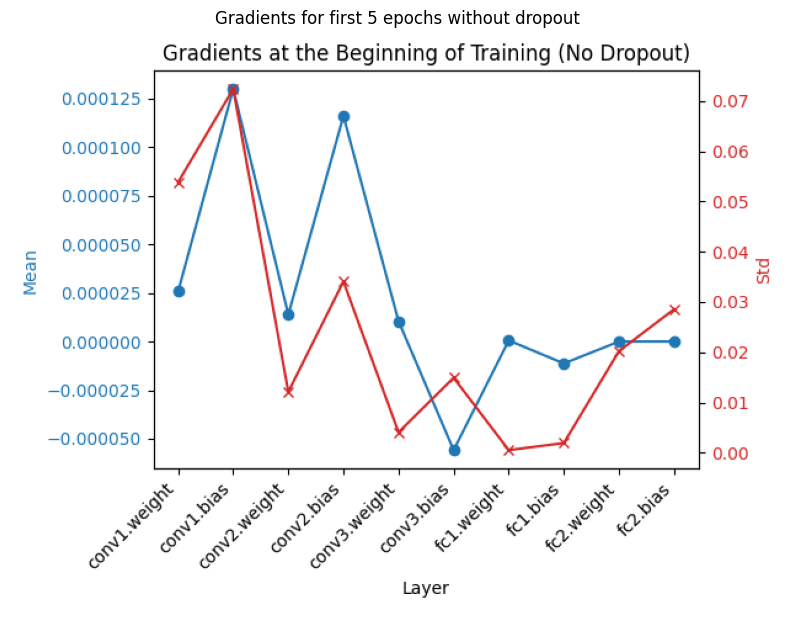

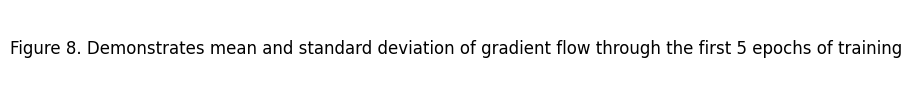

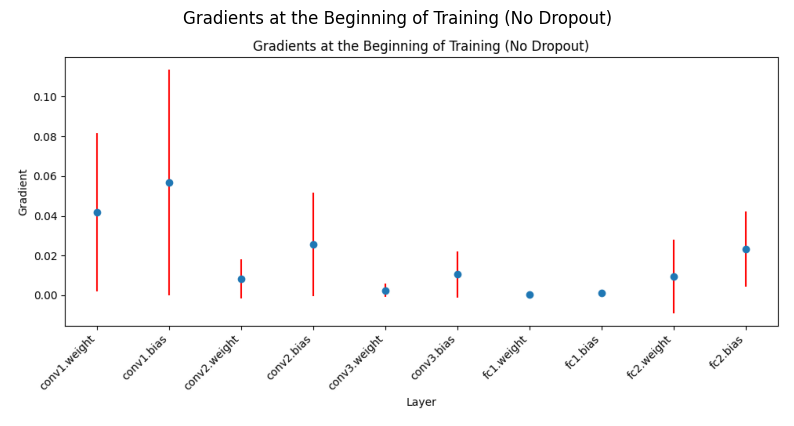

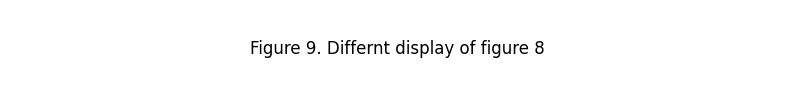

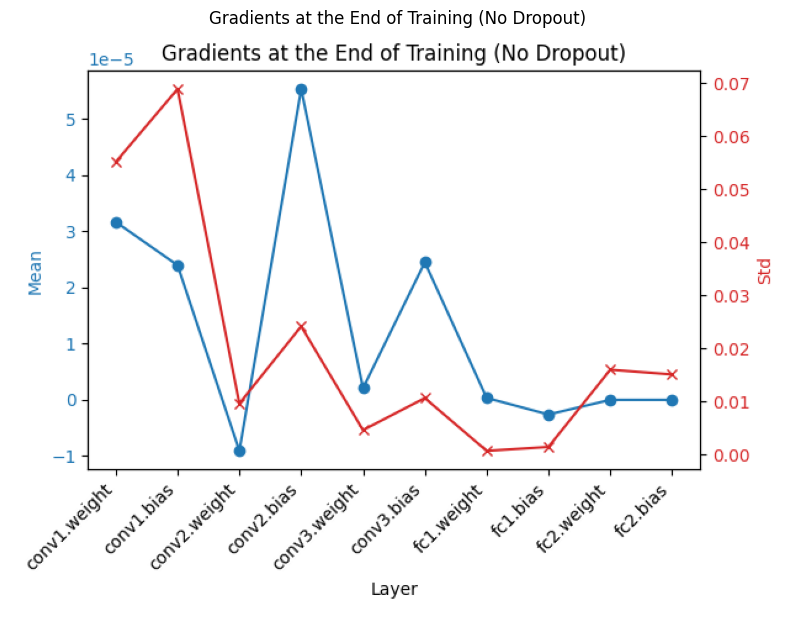

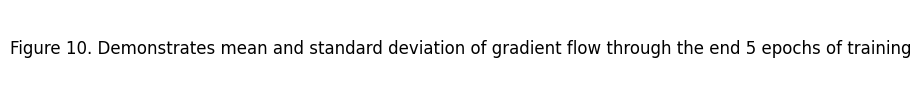

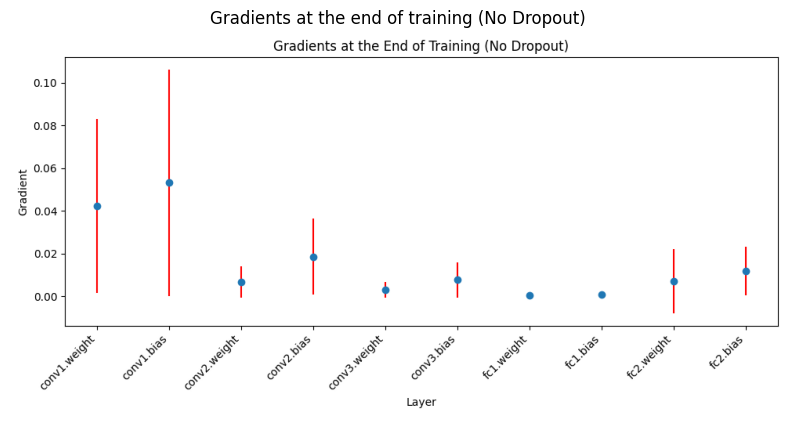

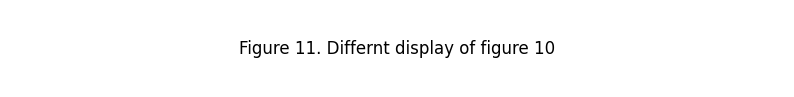

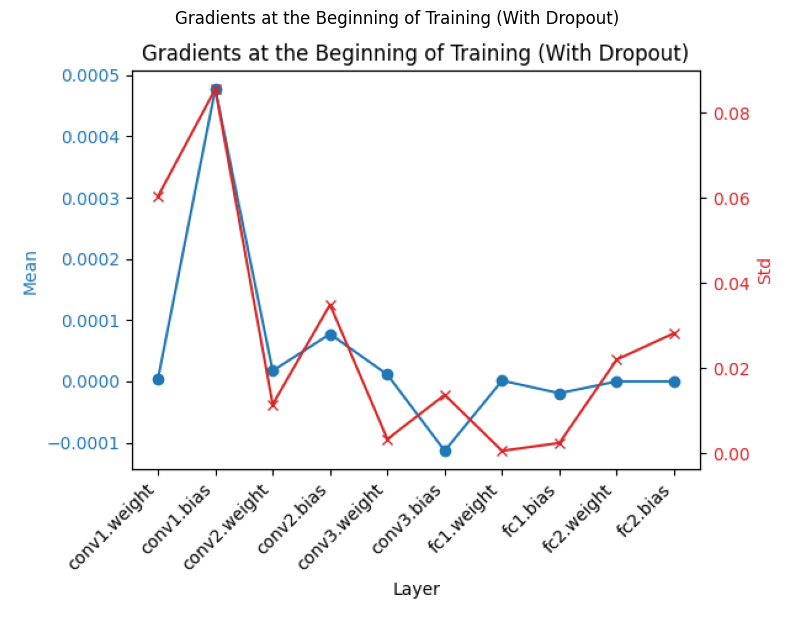

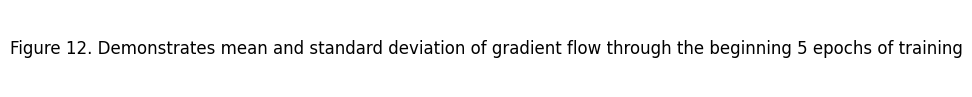

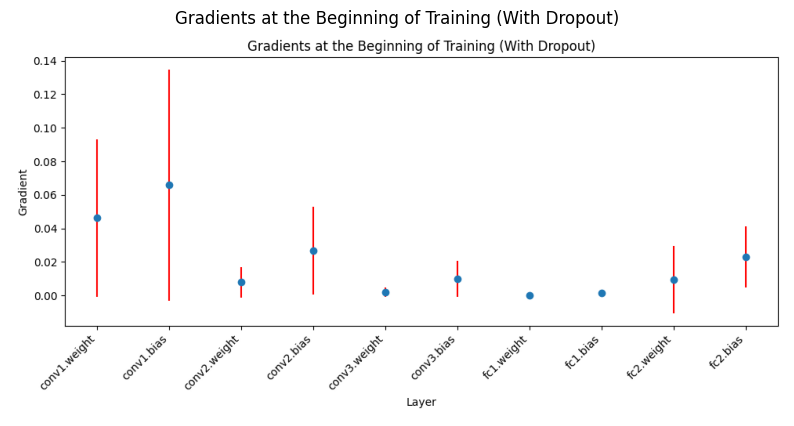

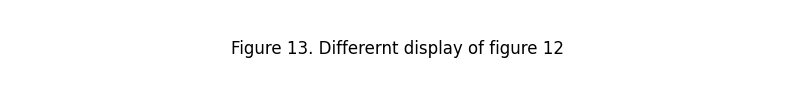

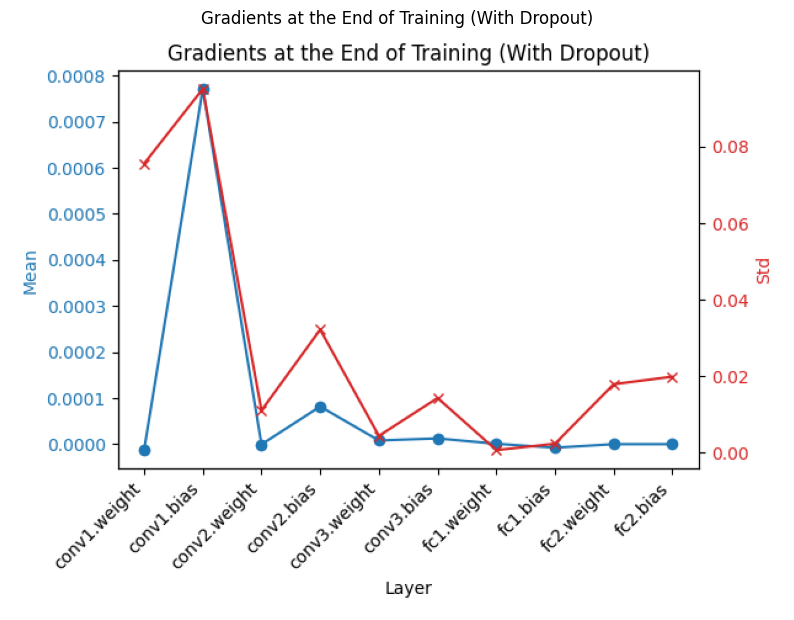

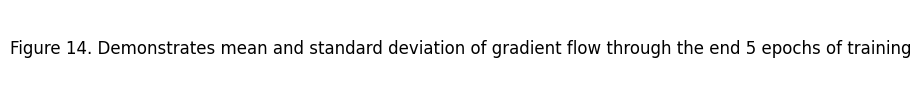

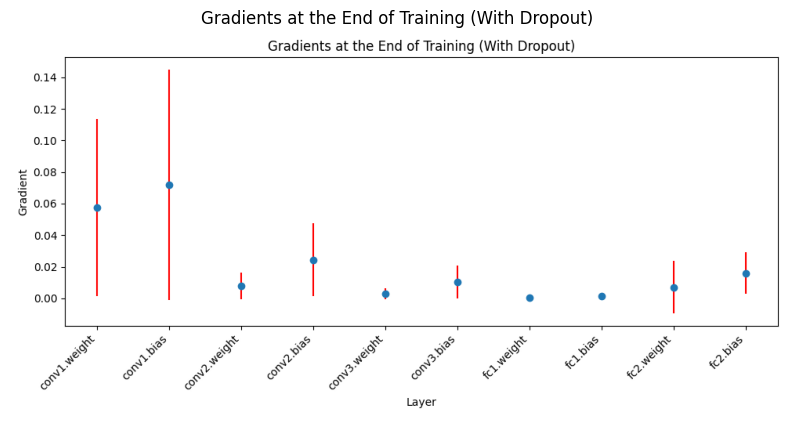

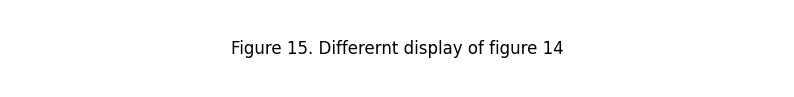

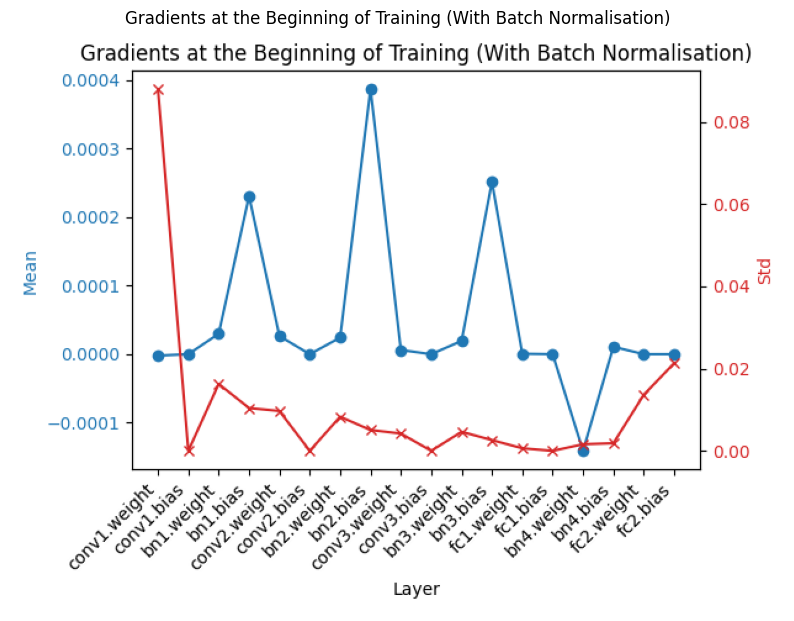

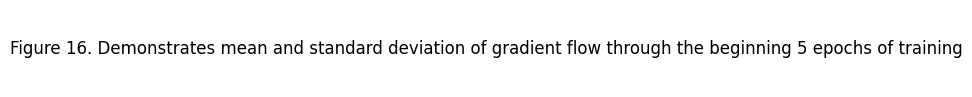

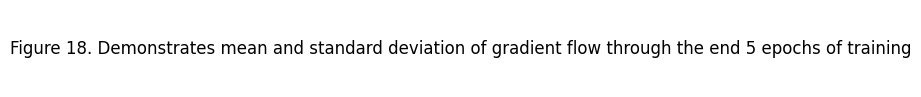

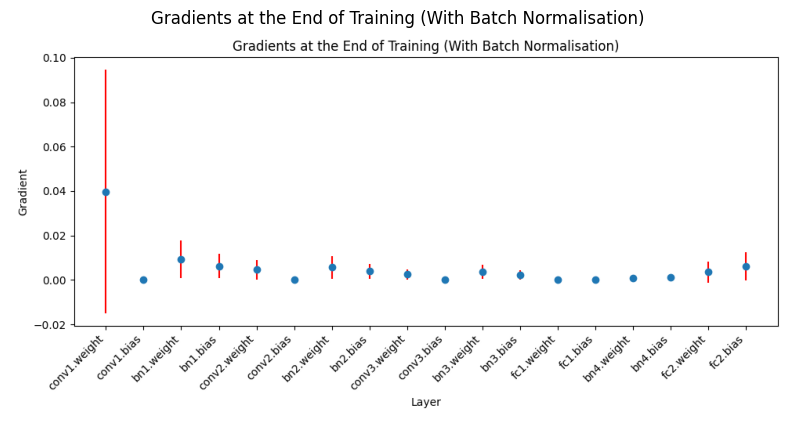

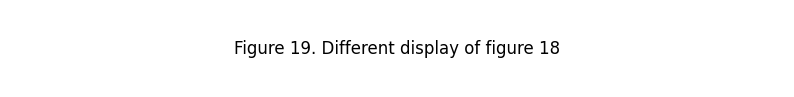

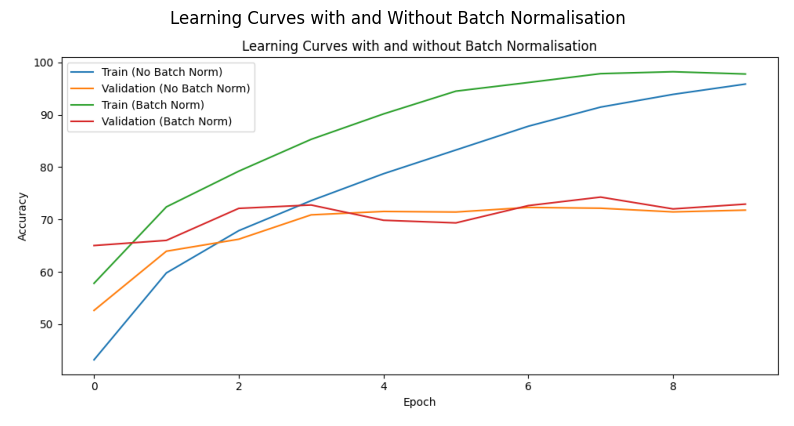

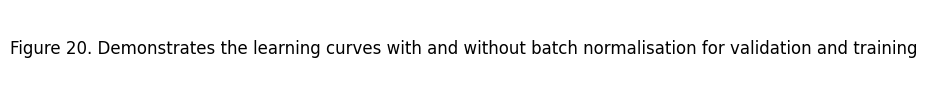

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = 'Gradients at the Beginning of Training (No Dropout) Line Graph.png'
img = mpimg.imread(image_path)
fig = plt.figure(figsize=(10, 10))

plt.title('Gradients for first 5 epochs without dropout')

plt.imshow(img)
plt.axis('off')
plt.show()

captionText = ('Figure 8. Demonstrates mean and standard deviation of gradient flow through the first 5 epochs of training')

fig, ax = plt.subplots(figsize=(10, 1))
fig.patch.set_visible(False)
ax.axis('off')

plt.text(0.5, 0.5, captionText, ha='center', va='center', wrap=True, fontsize=12)
plt.show()

image_path = 'Gradients at the Beginning of Training (No Dropout).png'
img = mpimg.imread(image_path)
fig = plt.figure(figsize=(10, 10))

plt.title('Gradients at the Beginning of Training (No Dropout)')

plt.imshow(img)
plt.axis('off')
plt.show()

captionText = ('Figure 9. Differnt display of figure 8')

fig, ax = plt.subplots(figsize=(10, 1))
fig.patch.set_visible(False)
ax.axis('off')

plt.text(0.5, 0.5, captionText, ha='center', va='center', wrap=True, fontsize=12)
plt.show()

image_path = 'Gradients at the End of Training (No Dropout) Line Graph.png'
img = mpimg.imread(image_path)
fig = plt.figure(figsize=(10, 10))

plt.title('Gradients at the End of Training (No Dropout)')

plt.imshow(img)
plt.axis('off')
plt.show()

captionText = ('Figure 10. Demonstrates mean and standard deviation of gradient flow through the end 5 epochs of training')

fig, ax = plt.subplots(figsize=(10, 1))
fig.patch.set_visible(False)
ax.axis('off')

plt.text(0.5, 0.5, captionText, ha='center', va='center', wrap=True, fontsize=12)
plt.show()

image_path = 'Gradients at the End of Training (No Dropout).png'
img = mpimg.imread(image_path)
fig = plt.figure(figsize=(10, 10))

plt.title('Gradients at the end of training (No Dropout)')

plt.imshow(img)
plt.axis('off')
plt.show()

captionText = ('Figure 11. Differnt display of figure 10')

fig, ax = plt.subplots(figsize=(10, 1))
fig.patch.set_visible(False)
ax.axis('off')

plt.text(0.5, 0.5, captionText, ha='center', va='center', wrap=True, fontsize=12)
plt.show()

image_path = 'Gradients at the Beginning of Training (With Dropout) Line Graph.png'
img = mpimg.imread(image_path)
fig = plt.figure(figsize=(10, 10))

plt.title('Gradients at the Beginning of Training (With Dropout)')

plt.imshow(img)
plt.axis('off')
plt.show()

captionText = ('Figure 12. Demonstrates mean and standard deviation of gradient flow through the beginning 5 epochs of training')

fig, ax = plt.subplots(figsize=(10, 1))
fig.patch.set_visible(False)
ax.axis('off')

plt.text(0.5, 0.5, captionText, ha='center', va='center', wrap=True, fontsize=12)
plt.show()

image_path = 'Gradients at the Beginning of Training (With Dropout).png'
img = mpimg.imread(image_path)
fig = plt.figure(figsize=(10, 10))

plt.title('Gradients at the Beginning of Training (With Dropout)')

plt.imshow(img)
plt.axis('off')
plt.show()

captionText = ('Figure 13. Differernt display of figure 12')

fig, ax = plt.subplots(figsize=(10, 1))
fig.patch.set_visible(False)
ax.axis('off')

plt.text(0.5, 0.5, captionText, ha='center', va='center', wrap=True, fontsize=12)
plt.show()
image_path = 'Gradients at the End of Training (With Dropout) line graph.png'
img = mpimg.imread(image_path)
fig = plt.figure(figsize=(10, 10))

plt.title('Gradients at the End of Training (With Dropout)')

plt.imshow(img)
plt.axis('off')
plt.show()

captionText = ('Figure 14. Demonstrates mean and standard deviation of gradient flow through the end 5 epochs of training')

fig, ax = plt.subplots(figsize=(10, 1))
fig.patch.set_visible(False)
ax.axis('off')

plt.text(0.5, 0.5, captionText, ha='center', va='center', wrap=True, fontsize=12)
plt.show()

image_path = 'Gradients at the End of Training (With Dropout).png'
img = mpimg.imread(image_path)
fig = plt.figure(figsize=(10, 10))

plt.title('Gradients at the End of Training (With Dropout)')

plt.imshow(img)
plt.axis('off')
plt.show()

captionText = ('Figure 15. Differernt display of figure 14')

fig, ax = plt.subplots(figsize=(10, 1))
fig.patch.set_visible(False)
ax.axis('off')

plt.text(0.5, 0.5, captionText, ha='center', va='center', wrap=True, fontsize=12)
plt.show()

image_path = 'Gradients at the Beginning of Training (With Batch Normalisation) line graph.png'
img = mpimg.imread(image_path)
fig = plt.figure(figsize=(10, 10))

plt.title('Gradients at the Beginning of Training (With Batch Normalisation)')

plt.imshow(img)
plt.axis('off')
plt.show()

captionText = ('Figure 16. Demonstrates mean and standard deviation of gradient flow through the beginning 5 epochs of training')

fig, ax = plt.subplots(figsize=(10, 1))
fig.patch.set_visible(False)
ax.axis('off')

plt.text(0.5, 0.5, captionText, ha='center', va='center', wrap=True, fontsize=12)
plt.show()
image_path = 'Gradients at the Beginning of Training (With Batch Normalisation).png'
img = mpimg.imread(image_path)
fig = plt.figure(figsize=(10, 10))

plt.title('Gradients at the Beginning of Training (With Batch Normalisation)')

plt.imshow(img)
plt.axis('off')
plt.show()

captionText = ('Figure 17. Different display of figure 16')

fig, ax = plt.subplots(figsize=(10, 1))
fig.patch.set_visible(False)
ax.axis('off')

plt.text(0.5, 0.5, captionText, ha='center', va='center', wrap=True, fontsize=12)
plt.show()

image_path = 'Gradients at the End of Training (With Batch Normalisation) line graph.png'
img = mpimg.imread(image_path)
fig = plt.figure(figsize=(10, 10))

plt.title('Gradients at the End of Training (With Batch Normalisation)')

plt.imshow(img)
plt.axis('off')
plt.show()

captionText = ('Figure 18. Demonstrates mean and standard deviation of gradient flow through the end 5 epochs of training')

fig, ax = plt.subplots(figsize=(10, 1))
fig.patch.set_visible(False)
ax.axis('off')

plt.text(0.5, 0.5, captionText, ha='center', va='center', wrap=True, fontsize=12)
plt.show()

image_path = 'Gradients at the End of Training (With Batch Normalisation).png'
img = mpimg.imread(image_path)
fig = plt.figure(figsize=(10, 10))

plt.title('Gradients at the End of Training (With Batch Normalisation)')

plt.imshow(img)
plt.axis('off')
plt.show()

captionText = ('Figure 19. Different display of figure 18')

fig, ax = plt.subplots(figsize=(10, 1))
fig.patch.set_visible(False)
ax.axis('off')

plt.text(0.5, 0.5, captionText, ha='center', va='center', wrap=True, fontsize=12)
plt.show()

image_path = 'Learning Curves with and Without Batch Normalisation.png'
img = mpimg.imread(image_path)
fig = plt.figure(figsize=(10, 10))

plt.title('Learning Curves with and Without Batch Normalisation')

plt.imshow(img)
plt.axis('off')
plt.show()

captionText = ('Figure 20. Demonstrates the learning curves with and without batch normalisation for validation and training')

fig, ax = plt.subplots(figsize=(10, 1))
fig.patch.set_visible(False)
ax.axis('off')

plt.text(0.5, 0.5, captionText, ha='center', va='center', wrap=True, fontsize=12)
plt.show()

Defining transformations...
Loading CIFAR10 dataset...
Files already downloaded and verified
Files already downloaded and verified
Splitting the dataset into two halves for training and validation...
Creating data loaders...
Data loaders created.
Defining the CNN model without Dropout...
Model defined.
Training model for 10 epochs and recording gradients...
Epoch 1/10...
Epoch 2/10...
Epoch 3/10...
Epoch 4/10...
Epoch 5/10...
Epoch 6/10...
Epoch 7/10...
Epoch 8/10...
Epoch 9/10...
Epoch 10/10...
Training completed.
Defining the CNN model with Dropout...
Training model for 10 epochs and recording gradients...
Epoch 1/10...
Epoch 2/10...
Epoch 3/10...
Epoch 4/10...
Epoch 5/10...
Epoch 6/10...
Epoch 7/10...
Epoch 8/10...
Epoch 9/10...
Epoch 10/10...
Training completed.
Defining the CNN model with Batch Normalisation...
Training model for 10 epochs and recording gradients...
Epoch 1/10...
Epoch 2/10...
Epoch 3/10...
Epoch 4/10...
Epoch 5/10...
Epoch 6/10...
Epoch 7/10...
Epoch 8/10...
Epoc

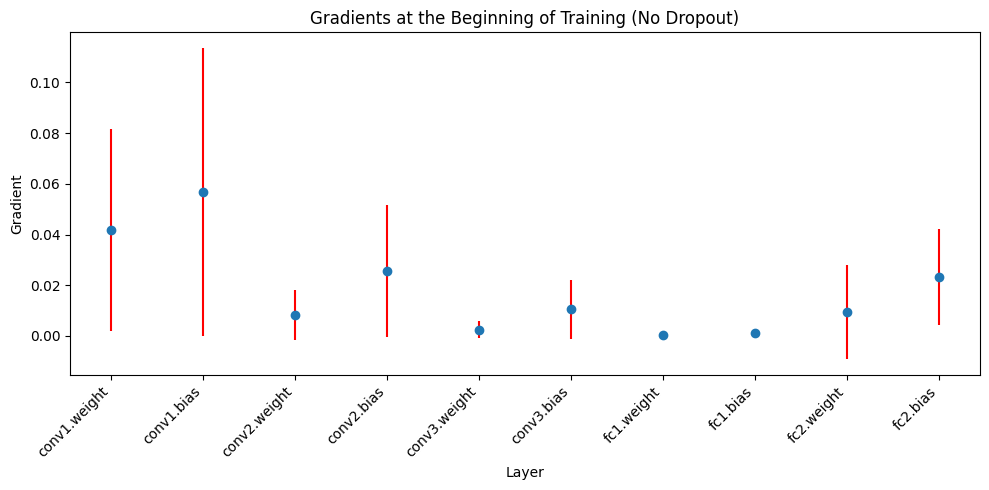

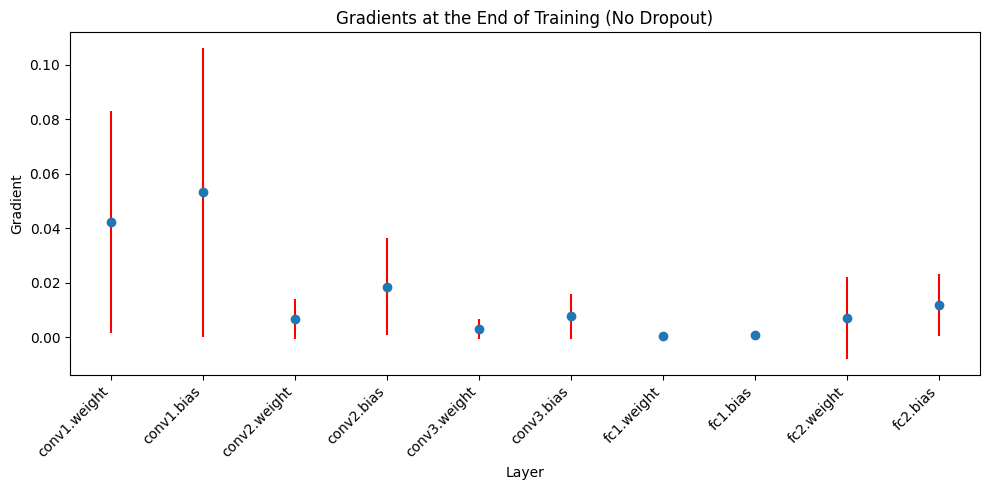

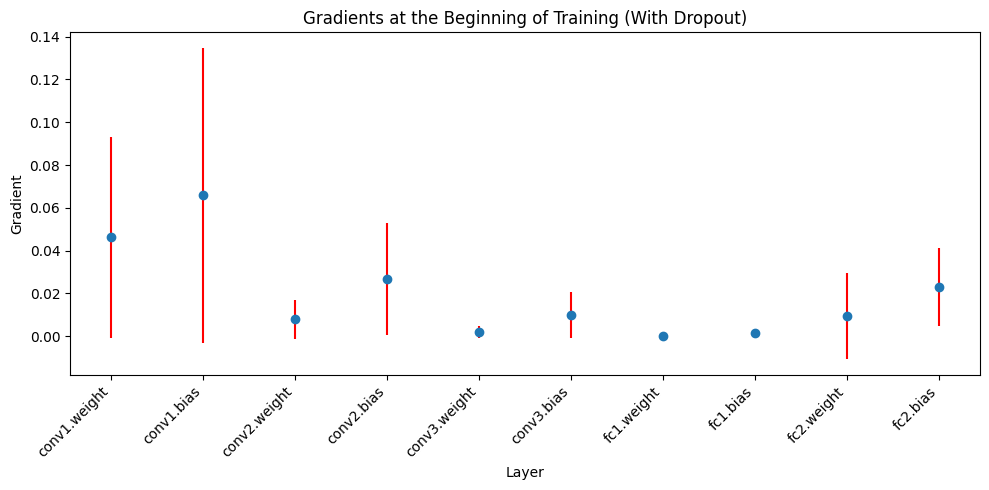

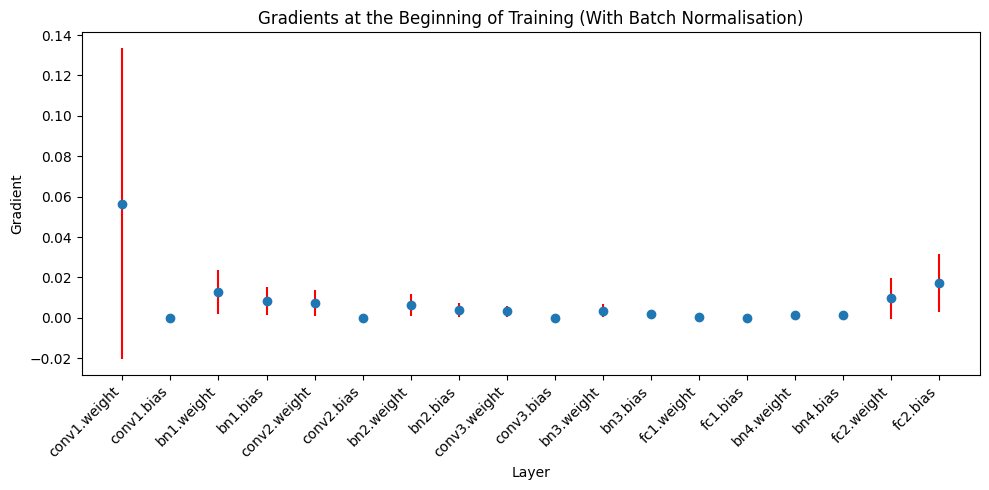

Training model for 10 epochs and recording learning curves...
Epoch 1/10...
Epoch 1 - Train Accuracy: 43.19%, Val Accuracy: 52.62%
Epoch 2/10...
Epoch 2 - Train Accuracy: 59.79%, Val Accuracy: 63.94%
Epoch 3/10...
Epoch 3 - Train Accuracy: 67.86%, Val Accuracy: 66.23%
Epoch 4/10...
Epoch 4 - Train Accuracy: 73.59%, Val Accuracy: 70.88%
Epoch 5/10...
Epoch 5 - Train Accuracy: 78.74%, Val Accuracy: 71.53%
Epoch 6/10...
Epoch 6 - Train Accuracy: 83.27%, Val Accuracy: 71.42%
Epoch 7/10...
Epoch 7 - Train Accuracy: 87.80%, Val Accuracy: 72.30%
Epoch 8/10...
Epoch 8 - Train Accuracy: 91.46%, Val Accuracy: 72.15%
Epoch 9/10...
Epoch 9 - Train Accuracy: 93.89%, Val Accuracy: 71.44%
Epoch 10/10...
Epoch 10 - Train Accuracy: 95.86%, Val Accuracy: 71.78%
Training model for 10 epochs and recording learning curves...
Epoch 1/10...
Epoch 1 - Train Accuracy: 57.80%, Val Accuracy: 65.02%
Epoch 2/10...
Epoch 2 - Train Accuracy: 72.40%, Val Accuracy: 66.00%
Epoch 3/10...
Epoch 3 - Train Accuracy: 79.22%

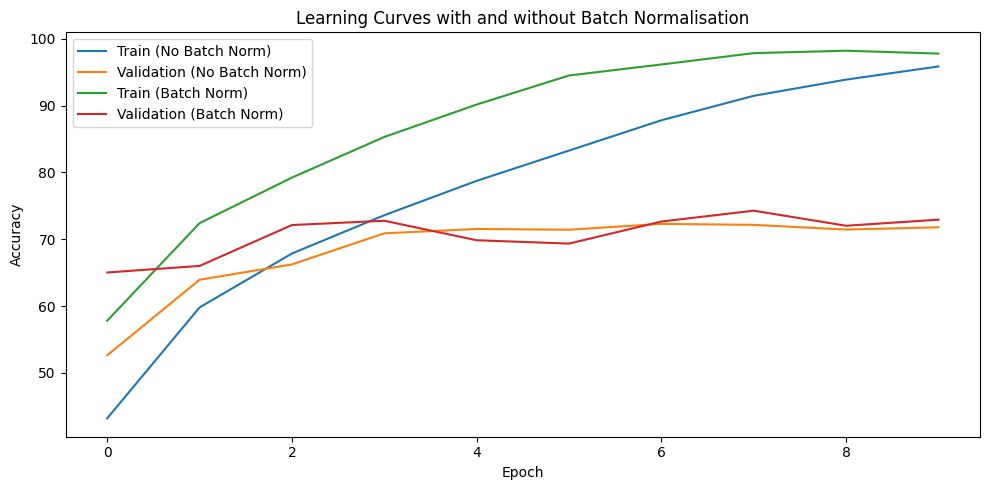

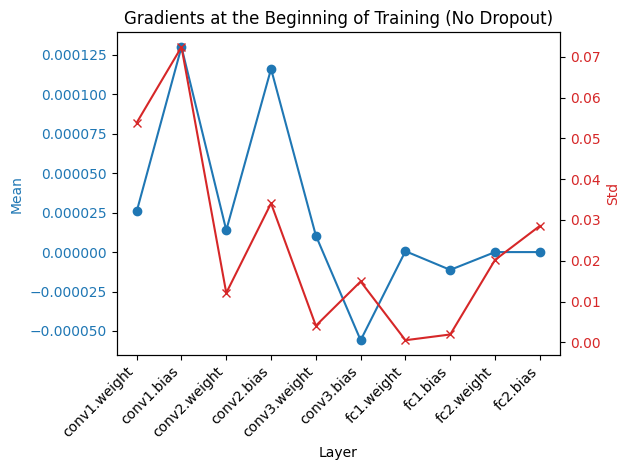

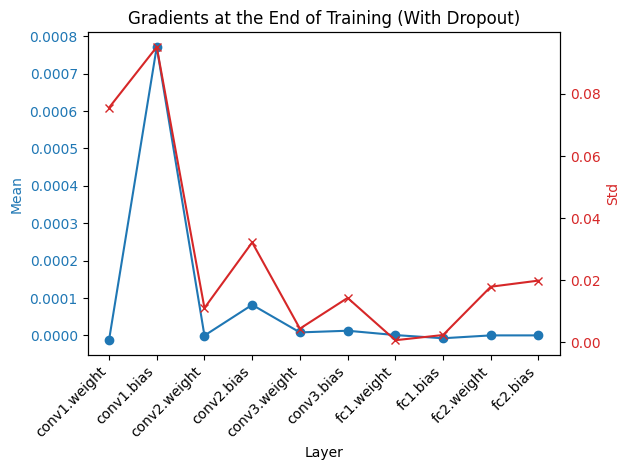

In [ ]:
#############################
### Code for Experiment 3 ###
#############################
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import random_split, DataLoader
import numpy as np
import matplotlib.pyplot as plt

print("Defining transformations...")
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
])

# Load the CIFAR10 dataset
print("Loading CIFAR10 dataset...")
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# Splits the training set into two halves for training and validation
print("Splitting the dataset into two halves for training and validation...")
train_size = len(trainset) // 2  # Calculates size of training subset
val_size = len(trainset) - train_size  # Calculates size of validation subset
train_subset, val_subset = random_split(trainset, [train_size, val_size])  # Splits the dataset

# Creates data loaders
print("Creating data loaders...")
trainloader = DataLoader(train_subset, batch_size=100, shuffle=True, num_workers=2)  # DataLoader for training set
valloader = DataLoader(val_subset, batch_size=100, shuffle=False, num_workers=2)  # DataLoader for validation set
testloader = DataLoader(testset, batch_size=100, shuffle=False, num_workers=2)  # DataLoader for test set
print("Data loaders created.")

# Defines the CNN architecture without Dropout
print("Defining the CNN model without Dropout...")
class BaselineCNNWithoutDropout(nn.Module):
    def __init__(self):
        super(BaselineCNNWithoutDropout, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)  # First convolutional layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)  # Pooling layer
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)  # Second convolutional layer
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)  # Third convolutional layer
        self.fc1 = nn.Linear(128 * 4 * 4, 512)  # First fully connected layer
        self.fc2 = nn.Linear(512, 10)  # Second fully connected layer
        self.relu = nn.ReLU()  # ReLU activation function

    def forward(self, x):  # Defines the forward pass
        x = self.pool(self.relu(self.conv1(x)))  # Applys conv1, ReLU, and pooling
        x = self.pool(self.relu(self.conv2(x)))  # Applys conv2, ReLU, and pooling
        x = self.pool(self.relu(self.conv3(x)))  # Applys conv3, ReLU, and pooling
        x = x.view(-1, 128 * 4 * 4)  # Flattens the tensor
        x = self.relu(self.fc1(x))  # Applys fc1 and ReLU
        x = self.fc2(x)  # Applys fc2
        return x  # Returns the output

print("Model defined.")

# Function to train the model and record gradients
def train_model_with_gradients(model, trainloader, num_epochs=10):  # Defines the training function
    print(f"Training model for {num_epochs} epochs and recording gradients...")
    criterion = nn.CrossEntropyLoss()  # Defines the loss function
    optimizer = optim.Adam(model.parameters(), lr=0.001)  # Defines the optimizer (Adam)

    gradient_records = {name: [] for name, param in model.named_parameters() if param.requires_grad}  # Initialises gradient records
    first_5_epochs_gradients = []  # Initialises gradients for the first 5 epochs
    last_5_epochs_gradients = []  # Initialises gradients for the last 5 epochs

    for epoch in range(num_epochs):  # Loop over epochs
        print(f"Epoch {epoch+1}/{num_epochs}...")
        model.train()  # Sets the model to training mode

        for inputs, labels in trainloader:  # Loops over batches
            optimizer.zero_grad()  # Zero the parameter gradients
            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs, labels)  # Computes loss
            loss.backward()  # Backward pass
            optimizer.step()  # Update parameters

            for name, param in model.named_parameters():  # Loops over parameters
                if param.requires_grad:  # Checks if gradients are required
                    if epoch < 5:  # Checks if in the first 5 epochs
                        gradient_records[name].append(param.grad.view(-1).cpu().numpy())  # Records gradients
                    elif epoch >= (num_epochs - 5):  # Checks if in the last 5 epochs
                        gradient_records[name].append(param.grad.view(-1).cpu().numpy())  # Records gradients

        if epoch == 4:  # Checks if at the end of the first 5 epochs
            first_5_epochs_gradients = {name: np.array(gradient_records[name]) for name in gradient_records}  # Save gradients
            for name in gradient_records:  # Loops over gradient records
                gradient_records[name] = []  # Resets gradient records

    last_5_epochs_gradients = {name: np.array(gradient_records[name]) for name in gradient_records}  # Saves gradients

    print("Training completed.")
    return first_5_epochs_gradients, last_5_epochs_gradients  # Returns gradients

# Initialises and trains the model without Dropout
net_no_dropout = BaselineCNNWithoutDropout()  # Creates model instance
first_5_gradients_no_dropout, last_5_gradients_no_dropout = train_model_with_gradients(net_no_dropout, trainloader, num_epochs=10)  # Trains model

# Defines the CNN architecture with Dropout
print("Defining the CNN model with Dropout...")
class BaselineCNNWithDropout(nn.Module):
    def __init__(self, dropout_rate=0.6):  # Defines the constructor with dropout rate
        super(BaselineCNNWithDropout, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)  # First convolutional layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)  # Pooling layer
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)  # Second convolutional layer
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)  # Third convolutional layer
        self.fc1 = nn.Linear(128 * 4 * 4, 512)  # First fully connected layer
        self.fc2 = nn.Linear(512, 10)  # Second fully connected layer
        self.relu = nn.ReLU()  # ReLU activation function
        self.dropout = nn.Dropout(dropout_rate)  # Dropout layer

    def forward(self, x):  # Defines the forward pass
        x = self.pool(self.relu(self.conv1(x)))  # Applys conv1, ReLU, and pooling
        x = self.pool(self.relu(self.conv2(x)))  # Applys conv2, ReLU, and pooling
        x = self.pool(self.relu(self.conv3(x)))  # Applys conv3, ReLU, and pooling
        x = x.view(-1, 128 * 4 * 4)  # Flatten the tensor
        x = self.relu(self.fc1(x))  # Applys fc1 and ReLU
        x = self.dropout(x)  # Applys Dropout
        x = self.fc2(x)  # Applys fc2
        return x  # Returns the output

# Initialises and train the model with Dropout
net_with_dropout = BaselineCNNWithDropout(0.6)  # Creates model instance with dropout rate
first_5_gradients_dropout, last_5_gradients_dropout = train_model_with_gradients(net_with_dropout, trainloader, num_epochs=10)  # Trains model

# Defines the CNN architecture with Batch Normalisation
print("Defining the CNN model with Batch Normalisation...")
class BaselineCNNWithBatchNorm(nn.Module):  # Defines a new class for the model
    def __init__(self):  # Defines the constructor
        super(BaselineCNNWithBatchNorm, self).__init__()  # Calls the parent class constructor
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)  # First convolutional layer
        self.bn1 = nn.BatchNorm2d(32)  # First batch normalisation layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)  # Pooling layer
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)  # Second convolutional layer
        self.bn2 = nn.BatchNorm2d(64)  # Second batch normalisation layer
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)  # Third convolutional layer
        self.bn3 = nn.BatchNorm2d(128)  # Third batch normalisation layer
        self.fc1 = nn.Linear(128 * 4 * 4, 512)  # First fully connected layer
        self.bn4 = nn.BatchNorm1d(512)  # Fourth batch normalisation layer
        self.fc2 = nn.Linear(512, 10)  # Second fully connected layer
        self.relu = nn.ReLU()  # ReLU activation function

    def forward(self, x):  # Defines the forward pass
        x = self.pool(self.relu(self.bn1(self.conv1(x))))  # Applys conv1, batch norm, ReLU, and pooling
        x = self.pool(self.relu(self.bn2(self.conv2(x))))  # Applys conv2, batch norm, ReLU, and pooling
        x = self.pool(self.relu(self.bn3(self.conv3(x))))  # Applys conv3, batch norm, ReLU, and pooling
        x = x.view(-1, 128 * 4 * 4)  # Flattens the tensor
        x = self.relu(self.bn4(self.fc1(x)))  # Applys fc1, batch norm, and ReLU
        x = self.fc2(x)  # Applys fc2
        return x  # Returns the output

# Initialises and train the model with Batch Normalisation
net_with_batch_norm = BaselineCNNWithBatchNorm()  # Creates model instance
first_5_gradients_batch_norm, last_5_gradients_batch_norm = train_model_with_gradients(net_with_batch_norm, trainloader, num_epochs=10)  # Trains model

# Function to compute and plot mean and standard deviation of gradients
def plot_gradients(gradients, title):  # Defines the plotting function
    layer_names = list(gradients.keys())  # Gets layer names
    mean_gradients = [np.mean(np.abs(gradients[layer])) for layer in layer_names]  # Computes mean gradients
    std_gradients = [np.std(np.abs(gradients[layer])) for layer in layer_names]  # Computes std of gradients

    plt.figure(figsize=(10, 5))  # Creates a new figure
    plt.errorbar(range(len(layer_names)), mean_gradients, yerr=std_gradients, fmt='o', ecolor='r', capthick=2)  # Plots error bars
    plt.xticks(range(len(layer_names)), layer_names, rotation=45, ha='right')  # Set x-ticks
    plt.xlabel('Layer')  # Set x-label
    plt.ylabel('Gradient')  # Set y-label
    plt.title(title)  # Set title
    plt.tight_layout()  # Adjust layout
    plt.show()  # Show the plot

# Plot gradients for the model without Dropout
plot_gradients(first_5_gradients_no_dropout, 'Gradients at the Beginning of Training (No Dropout)')  # Plot for first 5 epochs
plot_gradients(last_5_gradients_no_dropout, 'Gradients at the End of Training (No Dropout)')  # Plot for last 5 epochs

# Plot gradients for the model with Dropout
plot_gradients(first_5_gradients_dropout, 'Gradients at the Beginning of Training (With Dropout)')  # Plot for first 5 epochs
plot_gradients(last_5_gradients_dropout, 'Gradients at the End of Training (With Dropout)')  # Plot for last 5 epochs

# Plot gradients for the model with Batch Normalisation
plot_gradients(first_5_gradients_batch_norm, 'Gradients at the Beginning of Training (With Batch Normalisation)')  # Plot for first 5 epochs
plot_gradients(last_5_gradients_batch_norm, 'Gradients at the End of Training (With Batch Normalisation)')  # Plot for last 5 epochs

# Function to train the model and record learning curves
def train_model_with_learning_curves(model, trainloader, valloader, num_epochs=10):  # Define the training function
    print(f"Training model for {num_epochs} epochs and recording learning curves...")  # Print status message
    criterion = nn.CrossEntropyLoss()  # Define the loss function
    optimizer = optim.Adam(model.parameters(), lr=0.001)  # Define the optimiser

    train_acc_list = []  # List to store training accuracy
    val_acc_list = []  # List to store validation accuracy

    for epoch in range(num_epochs):  # Loops over epochs
        print(f"Epoch {epoch+1}/{num_epochs}...")
        model.train()  # Sets model to training mode
        correct_train = 0  # Initialises correct predictions for training
        total_train = 0  # Initialises total predictions for training

        for inputs, labels in trainloader:  # Loops over training batches
            optimizer.zero_grad()  # Zero the parameter gradients
            outputs = model(inputs)  # Forward pass
            loss = criterion(outputs, labels)  # Compute loss
            loss.backward()  # Backward pass
            optimizer.step()  # Update parameters

            _, predicted = torch.max(outputs.data, 1)  # Gets predicted labels
            total_train += labels.size(0)  # Updates total predictions
            correct_train += (predicted == labels).sum().item()  # Updates correct predictions

        train_accuracy = 100 * correct_train / total_train  # Computes training accuracy
        train_acc_list.append(train_accuracy)  # Stores training accuracy

        model.eval()  # Sets model to evaluation mode
        correct_val = 0  # Initialise correct predictions for validation
        total_val = 0  # Initialise total predictions for validation

        with torch.no_grad():  # No gradient computation
            for inputs, labels in valloader:  # Loops over validation batches
                outputs = model(inputs)  # Forward pass
                _, predicted = torch.max(outputs.data, 1)  # Gets predicted labels
                total_val += labels.size(0)  # Updates total predictions
                correct_val += (predicted == labels).sum().item()  # Updates correct predictions

        val_accuracy = 100 * correct_val / total_val  # Computes validation accuracy
        val_acc_list.append(val_accuracy)  # Stores validation accuracy
        print(f"Epoch {epoch+1} - Train Accuracy: {train_accuracy:.2f}%, Val Accuracy: {val_accuracy:.2f}%")  # Print accuracy

    return train_acc_list, val_acc_list  # Returns accuracies

# Function to evaluate the model on the test set
def evaluate_model(model, testloader, label):  # Defines the evaluation function
    model.eval()  # Sets model to evaluation mode
    correct_test = 0  # Initialise correct predictions for testing
    total_test = 0  # Initialise total predictions for testing

    with torch.no_grad():
        for inputs, labels in testloader:  # Loops over test batches
            outputs = model(inputs)  # Forward pass
            _, predicted = torch.max(outputs.data, 1)  # Gets predicted labels
            total_test += labels.size(0)  # Updates total predictions
            correct_test += (predicted == labels).sum().item()  # Updates correct predictions

    test_accuracy = 100 * correct_test / total_test  # Computes test accuracy
    print(f"Test Accuracy ({label}): {test_accuracy:.2f}%")
    return test_accuracy  # Returns accuracy

# Trains the models and record learning curves
net_no_dropout = BaselineCNNWithoutDropout()  # Creates model instance without dropout
train_acc_no_bn, val_acc_no_bn = train_model_with_learning_curves(net_no_dropout, trainloader, valloader, num_epochs=10)

net_with_batch_norm = BaselineCNNWithBatchNorm()  # Creates model instance with batch normalisation
train_acc_bn, val_acc_bn = train_model_with_learning_curves(net_with_batch_norm, trainloader, valloader, num_epochs=10)

# Evaluates the models on the test set
test_acc_no_bn = evaluate_model(net_no_dropout, testloader, "No Batch Norm")  # Evaluates model without dropout
test_acc_bn = evaluate_model(net_with_batch_norm, testloader, "With Batch Norm")  # Evaluates model with batch normalisation

# Plot learning curves
plt.figure(figsize=(10, 5))  # Creates a new figure
plt.plot(range(10), train_acc_no_bn, label='Train (No Batch Norm)')  # Plot training accuracy without batch normalisation
plt.plot(range(10), val_acc_no_bn, label='Validation (No Batch Norm)')  # Plot validation accuracy without batch normalisation
plt.plot(range(10), train_acc_bn, label='Train (Batch Norm)')  # Plot training accuracy with batch normalisation
plt.plot(range(10), val_acc_bn, label='Validation (Batch Norm)')  # Plot validation accuracy with batch normalisation
plt.xlabel('Epoch')  # Set x-label
plt.ylabel('Accuracy')  # Set y-label
plt.title('Learning Curves with and without Batch Normalisation')  # Set title
plt.legend()  # Add legend
plt.tight_layout()  # Adjust layout
plt.show()  # Show the plot

# Function to plot mean and standard deviation of gradients
def plot_mean_std(gradients, title):  # Defines the plotting function
    layer_names = list(gradients.keys())  # Gets layer names
    means = [np.mean([np.mean(g) for g in gradients[layer]]) for layer in layer_names]  # Computes mean of means
    stds = [np.mean([np.std(g) for g in gradients[layer]]) for layer in layer_names]  # Computes mean of stds

    fig, ax1 = plt.subplots()  # Creates a new subplot

    color = 'tab:blue'  # Set color for mean
    ax1.set_xlabel('Layer')  # Set x-label
    ax1.set_ylabel('Mean', color=color)  # Set y-label for mean
    ax1.plot(layer_names, means, color=color, marker='o')  # Plot means
    ax1.tick_params(axis='y', labelcolor=color)  # Set y-ticks color
    plt.xticks(rotation=45, ha='right')  # Rotate x-ticks

    ax2 = ax1.twinx()  # Create a twin y-axis
    color = 'tab:red'  # Set color for std
    ax2.set_ylabel('Std', color=color)  # Set y-label for std
    ax2.plot(layer_names, stds, color=color, marker='x')  # Plot stds
    ax2.tick_params(axis='y', labelcolor=color)  # Set y-ticks color

    plt.title(title)  # Set title
    fig.tight_layout()  # Adjust layout
    plt.show()  # Show the plot

# Plot mean and standard deviation of gradients for the model without Dropout
plot_mean_std(first_5_gradients_no_dropout, 'Gradients at the Beginning of Training (No Dropout)')  # Plot for first 5 epochs
plot_mean_std(last_5_gradients_no_dropout, 'Gradients at the End of Training (No Dropout)')  # Plot for last 5 epochs

# Plot mean and standard deviation of gradients for the model with Dropout
plot_mean_std(first_5_gradients_dropout, 'Gradients at the Beginning of Training (With Dropout)')  # Plot for first 5 epochs
plot_mean_std(last_5_gradients_dropout, 'Gradients at the End of Training (With Dropout)')  # Plot for last 5 epochs

# Plot mean and standard deviation of gradients for the model with Batch Normalisation
plot_mean_std(first_5_gradients_batch_norm, 'Gradients at the Beginning of Training (With Batch Normalisation)')  # Plot for first 5 epochs
plot_mean_std(last_5_gradients_batch_norm, 'Gradients at the End of Training (With Batch Normalisation)')  # Plot for last 5 epochs



# Conclusions and Discussion (instructions) - 25 MARKS <ignore>
In this section, you are expected to:
* briefly summarise and describe the conclusions from your experiments (8 MARKS).
* discuss whether or not your results are expected, providing scientific reasons (8 MARKS).
* discuss two or more alternative/additional methods that may enhance your model, with scientific reasons (4 MARKS).
* Reference two or more relevant academic publications that support your discussion. (4 MARKS)

Experiment 1 demonstrated that even with the adams optimiser, learning rate significantly impacts the performance of a CNN, especially regarding how quickly it converges, with 0.001 providing a good balance between converging and stability, granting the best accuracy. Introducing the learning rate scheduler also further improves performance, by allowing it to make progress towards the minimum loss, opposed to oscillating between it.

Experiment 2 demonstrates that dropout can reduce the rate that a network learns, but can provide better generalisation as demonstrated by the best dropout being 0.6. Despite this, in the transfer learning task, dropout proved to be a hinderance and lost too much information from the pre-trained layers.

Experiment 3 demonstrates that dropout and batch normalisation can aid in helping prevent vanishing gradients and introduce more stability as seen by the reduction in std in the batch normalisation.

Experiment 1 went as expected, as with the adams optimiser the adaptive change in learning rates meant most learning rates were able to reach optimal minima. Experiment 2 also went mostly as expected, with dropout reducing convergence rate, but also allowing some better generalisation of the data, although, it would be more expected a lower drop out rate, such as 0.2, to be more beneficial to not lose too much information. Experiment 3,  batch normalisation provided stable and consistent gradient magnitudes, further preventing either exploding or vanishing gradients.

ResNet would be a strong addition to the baseline model, allowing it to address the vanishing gradient problem by using shortcut connections(He et al., 2016), allowing for enhanced feature learning thus leading to improved performance and accuracy. Furthermore, using automated tools such as random search (Domhan et al., 2015) would allow better hyperparameter tuning, improving performance.


# References (instructions) <ignore>
Use the cell below to add your references. A good format to use for references is like this:

[AB Name], [CD Name], [EF Name] ([year]), [Article title], [Journal/Conference Name] [volume], [page numbers] or [article number] or [doi]

Some examples:

JEM Bennett, A Phillipides, T Nowotny (2021), Learning with reinforcement prediction errors in a model of the Drosophila mushroom body, Nat. Comms 12:2569, doi: 10.1038/s41467-021-22592-4

SO Kaba, AK Mondal, Y Zhang, Y Bengio, S Ravanbakhsh (2023), Proc. 40th Int. Conf. Machine Learning, 15546-15566

Domhan, T., Springenberg, J.T., Hutter, F., 2015. Speeding up Automatic Hyperparameter Optimization of Deep Neural Networks by Extrapolation of Learning Curves.

He, K., Zhang, X., Ren, S., Sun, J., 2016. Deep Residual Learning for Image Recognition, in: 2016 IEEE Conference on Computer Vision and Pattern Recognition (CVPR). Presented at the 2016 IEEE Conference on Computer Vision and Pattern Recognition (CVPR), IEEE, Las Vegas, NV, USA, pp. 770–778. https://doi.org/10.1109/CVPR.2016.90

Phung, V.H., Rhee, E.J., 2019. A high-accuracy model average ensemble of convolutional neural networks for classification of cloud image patches on small datasets. Applied Sciences 9, 4500.

Zagoruyko, S., Komodakis, N., 2017. Wide Residual Networks.

